<center><h1>1-ab: Introduction to Neural Networks</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [1]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
!unzip -j 2-ab.zip
!wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-ab/utils-data.py

--2025-11-07 15:32:15--  https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip [following]
--2025-11-07 15:32:15--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13423991 (13M) [application/zip]
Saving to: ‘2-ab.zip.4’

2-ab.zip.4          100%[===================>]  12.80M  --.-KB/s    in 0.08s   

2025-11-07 15:32:16 (153 MB/s) - ‘2-ab.zip.4’ saved [13423991/13423991]

Archive:  2-ab.zip
replace ._2-ab? [y]es, [n]o

In [2]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'utils-data.py'

# Part 1 : Forward and backward passes "by hands"

In [3]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by

    std_dev = 0.3

    params["Wh"] = torch.randn(nh, nx) * std_dev
    params["Wy"] = torch.randn(ny, nh) * std_dev
    params["bh"] = torch.zeros(nh)
    params["by"] = torch.zeros(ny)

    ####################
    ##      END        #
    ####################
    return params

In [4]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].size(0)
    ny = params['Wy'].size(0)
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat

    outputs["X"] = X
    outputs["htilde"] = torch.mm(X, params["Wh"].t()) + params["bh"]
    outputs["h"] = torch.tanh(outputs["htilde"])
    outputs["ytilde"] = torch.mm(outputs["h"], params["Wy"].t()) + params["by"]
    outputs["yhat"] = torch.softmax(outputs["ytilde"], dim=1)

    ####################
    ##      END        #
    ####################

    return outputs['yhat'], outputs

In [5]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Your code here  ##
    #####################

    _, indY = torch.max(Y, dim=1)
    _, indYhat = torch.max(Yhat, dim=1)
    B = Y.shape[0]

    l = -torch.log(Yhat[torch.arange(B), indY])
    L = torch.mean(l)
    acc = torch.mean((indY == indYhat).float()) * 100    # percentage

    ####################
    ##      END        #
    ####################

    return L, acc

In [6]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh

    grad_ytilde = (outputs['yhat'] - Y)
    grad_htilde = (torch.mm(grad_ytilde, params["Wy"])) * (1 - outputs["h"] ** 2)

    grads["Wy"] = torch.mm(grad_ytilde.t(), outputs['h'])
    grads["Wh"] = torch.mm(grad_htilde.t(), outputs["X"])
    grads["by"] = torch.sum(grad_ytilde, axis=0).t()
    grads["bh"] = torch.sum(grad_htilde, axis=0).t()

    ####################
    ##      END        #
    ####################
    return grads

In [7]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    params["Wh"] -= eta * grads["Wh"]
    params["Wy"] -= eta * grads["Wy"]
    params["bh"] -= eta * grads["bh"]
    params["by"] -= eta * grads["by"]

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure "by hands"

In [8]:
def train_by_hand(params, eta, N, Nbatch, data):
    curves = [[],[], [], []]

    # epoch
    for iteration in range(150):

        # permute
        perm = np.random.permutation(N)
        Xtrain = data.Xtrain[perm, :]
        Ytrain = data.Ytrain[perm, :]

        #####################
        ## Your code here  ##
        #####################
        # batches
        for j in range(N // Nbatch):

            indsBatch = range(j * Nbatch, (j+1) * Nbatch)
            X = Xtrain[indsBatch, :]
            Y = Ytrain[indsBatch, :]

            # write the optimization algorithm on the batch (X,Y)
            # using the functions: forward, loss_accuracy, backward, sgd
            Yhat, outputs = forward(params, X)
            L, acc = loss_accuracy(Yhat, Y)
            grads = backward(params, outputs, Y)
            params = sgd(params, grads, eta)


        ####################
        ##      END        #
        ####################


        Yhat_train, _ = forward(params, data.Xtrain)
        Yhat_test, _ = forward(params, data.Xtest)
        Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
        Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
        Ygrid, _ = forward(params, data.Xgrid)

        if iteration % 30 == 0 or iteration == 149:
            title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
            print(title)
            data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

        curves[0].append(acctrain)
        curves[1].append(acctest)
        curves[2].append(Ltrain)
        curves[3].append(Ltest)

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Model Performance Over Epochs', fontsize=16)

    ax1 = axs[0]
    ax1.plot(curves[0], label="Train Accuracy")
    ax1.plot(curves[1], label="Test Accuracy")
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy (%)')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.6)


    ax2 = axs[1]

    ax2.plot(curves[2], label="Train Loss")
    ax2.plot(curves[3], label="Test Loss")
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss Value')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### Default value for $\eta$ and `Nbatch`

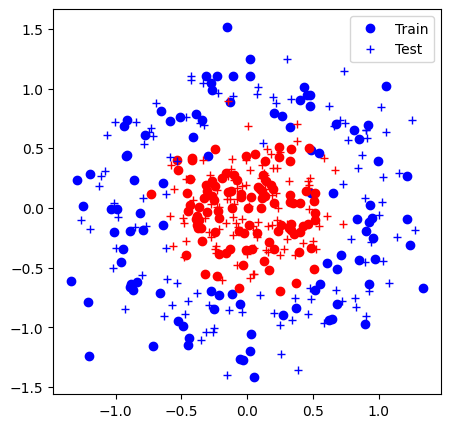

Iter 0: Acc train 50.0% (0.70), acc test 50.0% (0.70)


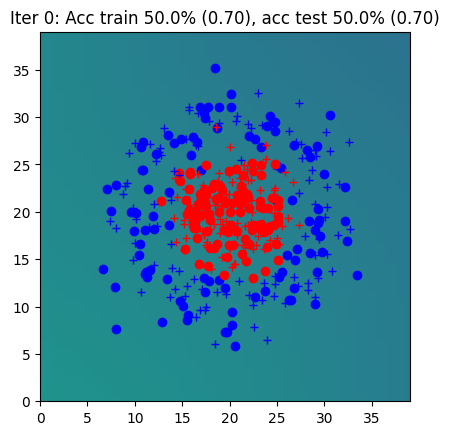

Iter 30: Acc train 95.0% (0.16), acc test 95.5% (0.17)


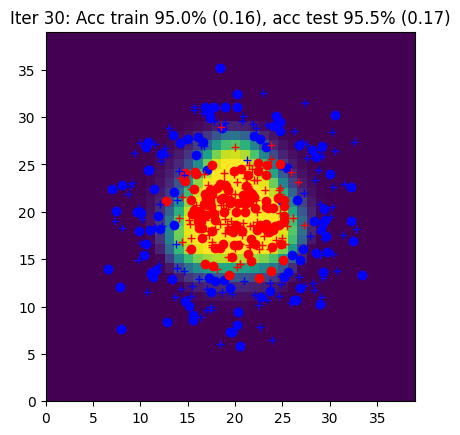

Iter 60: Acc train 95.0% (0.13), acc test 95.0% (0.15)


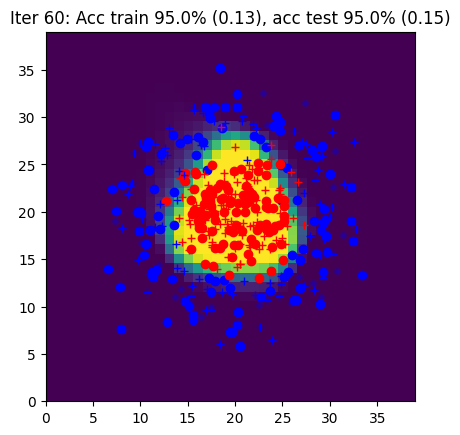

Iter 90: Acc train 94.5% (0.12), acc test 95.0% (0.15)


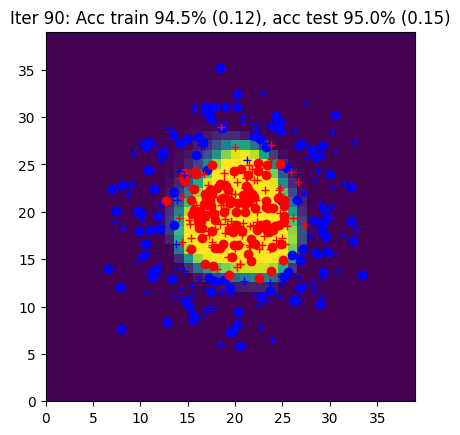

Iter 120: Acc train 93.0% (0.14), acc test 92.5% (0.19)


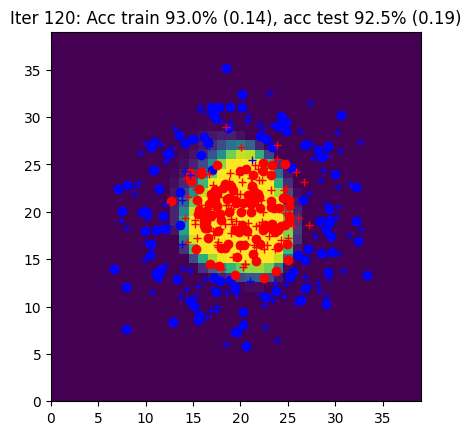

Iter 149: Acc train 95.0% (0.12), acc test 94.0% (0.17)


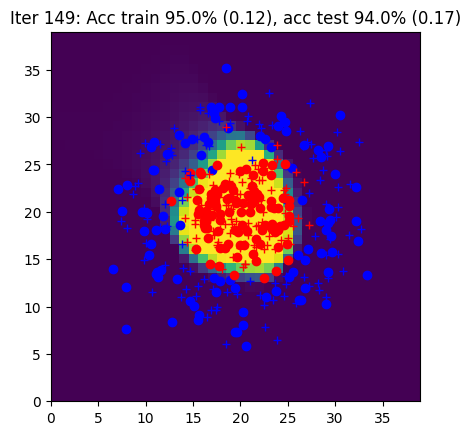

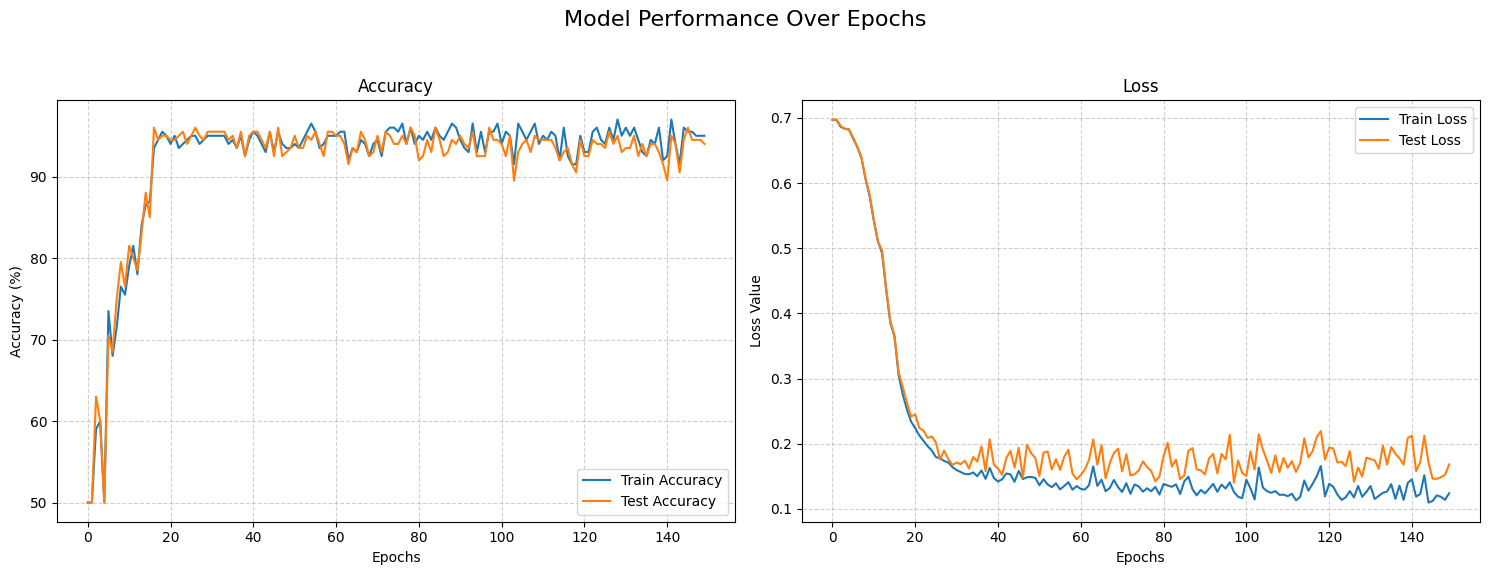

In [9]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)
train_by_hand(params, eta, N, Nbatch, data)


### $\eta = 0.3$

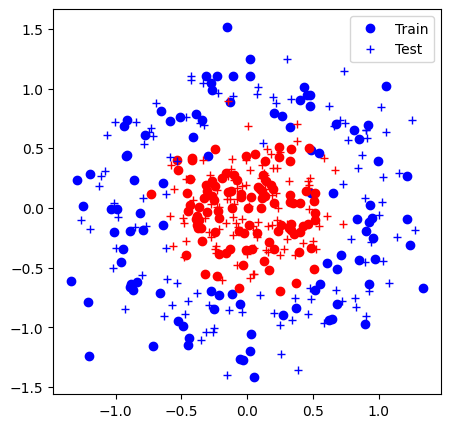

Iter 0: Acc train 57.0% (1.88), acc test 60.5% (1.81)


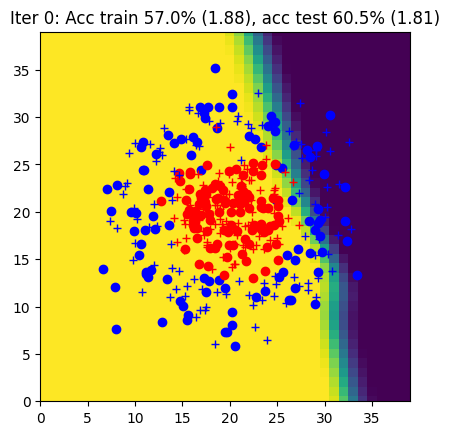

Iter 30: Acc train 95.0% (0.22), acc test 95.0% (0.35)


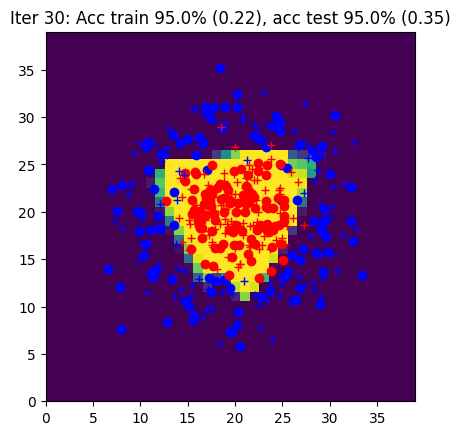

Iter 60: Acc train 96.0% (0.16), acc test 92.5% (0.34)


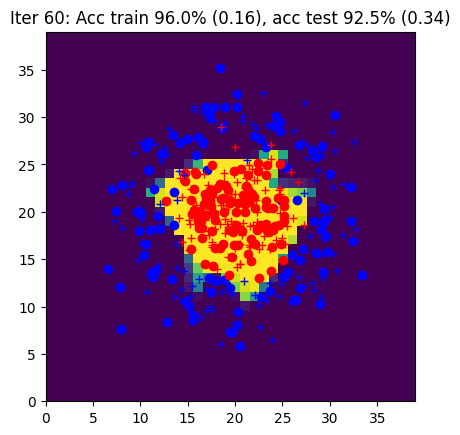

Iter 90: Acc train 94.5% (0.20), acc test 92.0% (0.41)


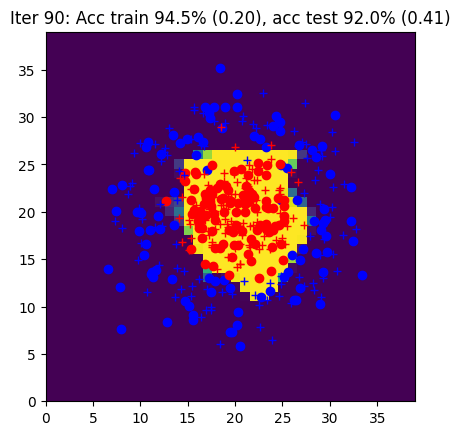

Iter 120: Acc train 96.0% (0.14), acc test 90.0% (0.48)


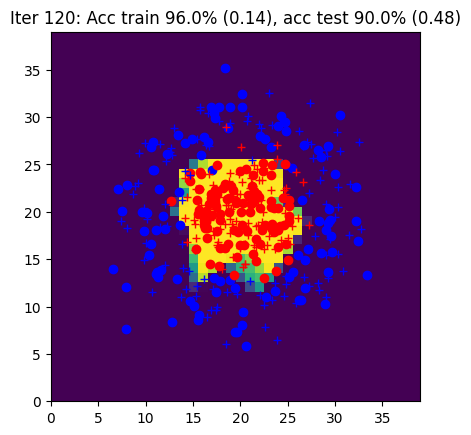

Iter 149: Acc train 96.0% (0.10), acc test 92.0% (0.43)


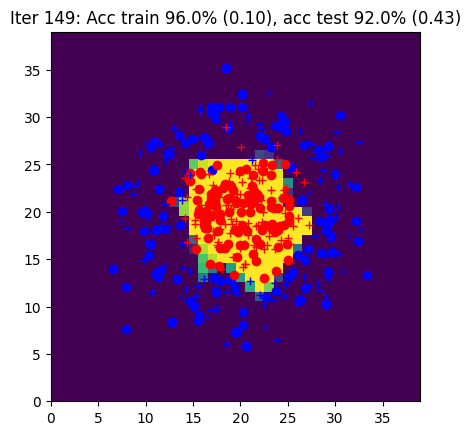

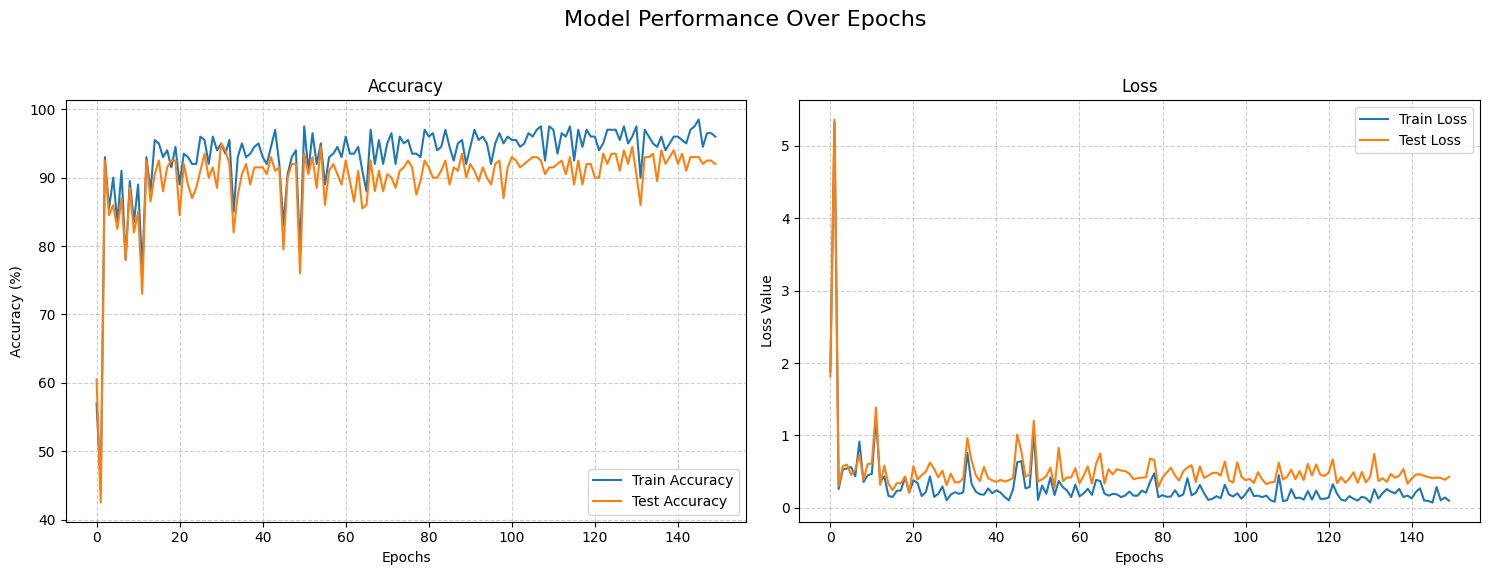

In [10]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.3

params = init_params(nx, nh, ny)
train_by_hand(params, eta, N, Nbatch, data)

### $\eta = 0.001$

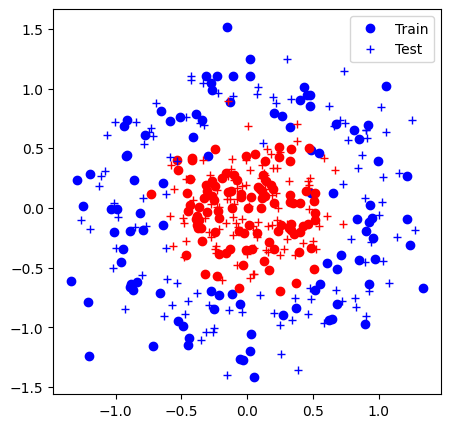

Iter 0: Acc train 49.5% (0.70), acc test 49.5% (0.70)


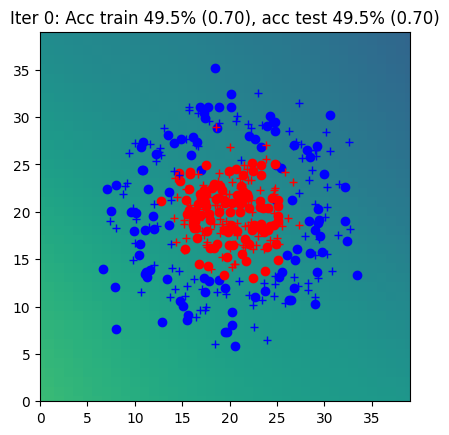

Iter 30: Acc train 58.5% (0.69), acc test 60.5% (0.69)


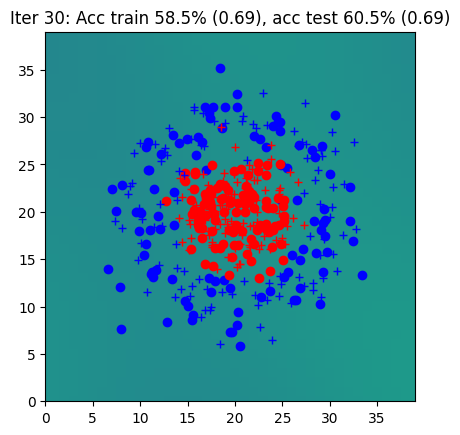

Iter 60: Acc train 56.5% (0.69), acc test 60.0% (0.69)


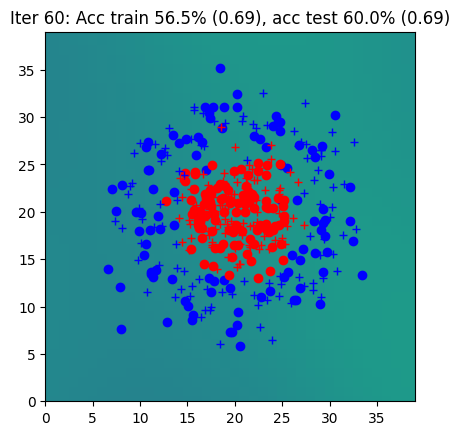

Iter 90: Acc train 59.0% (0.69), acc test 61.5% (0.69)


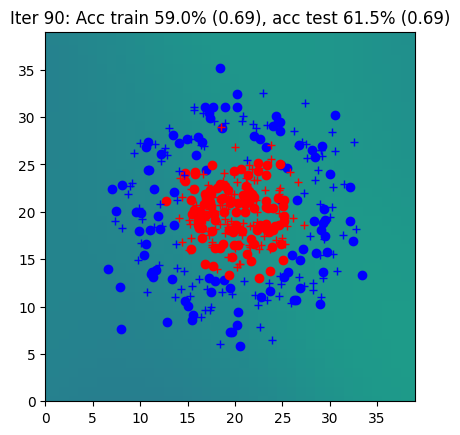

Iter 120: Acc train 60.5% (0.68), acc test 62.5% (0.69)


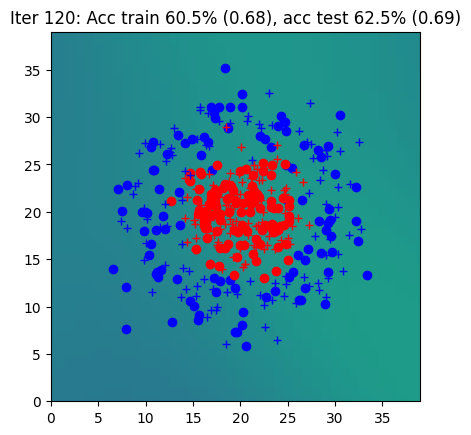

Iter 149: Acc train 64.0% (0.68), acc test 65.0% (0.68)


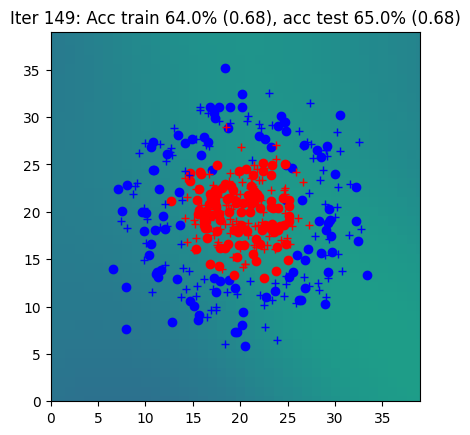

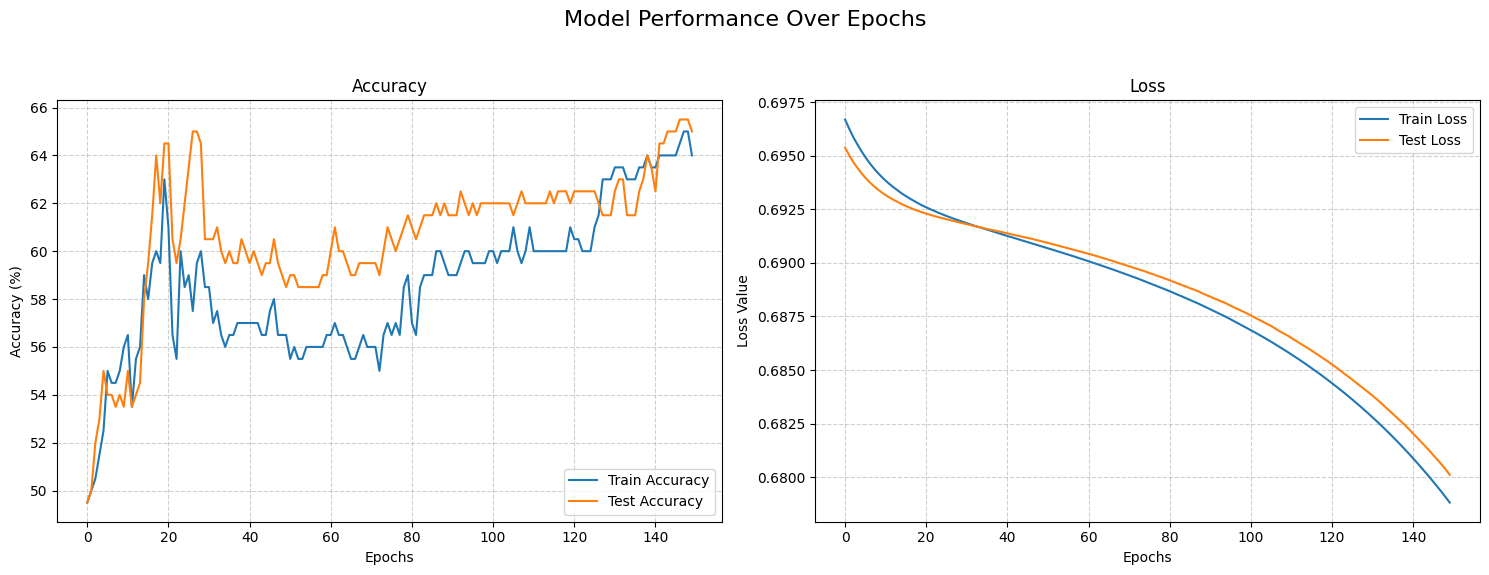

In [11]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.001

params = init_params(nx, nh, ny)
train_by_hand(params, eta, N, Nbatch, data)

### `Nbatch = 1`

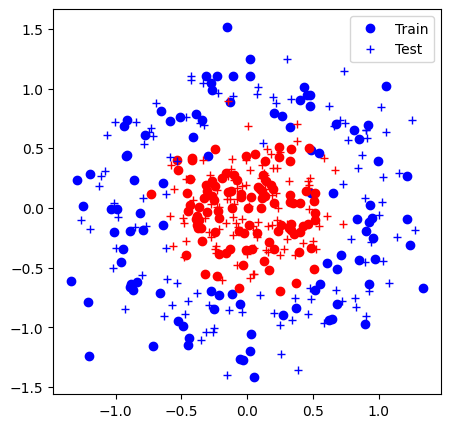

Iter 0: Acc train 37.0% (0.69), acc test 40.5% (0.69)


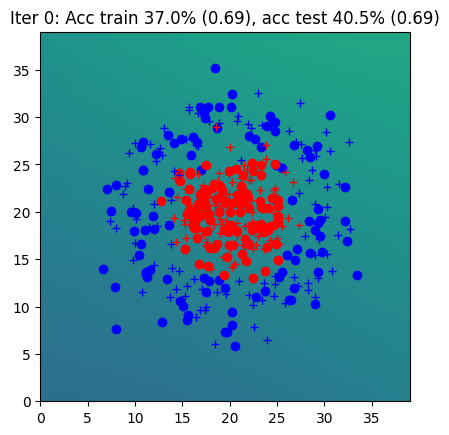

Iter 30: Acc train 94.5% (0.20), acc test 95.5% (0.21)


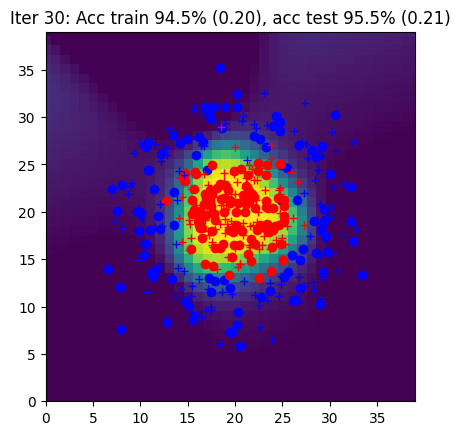

Iter 60: Acc train 94.0% (0.14), acc test 95.5% (0.16)


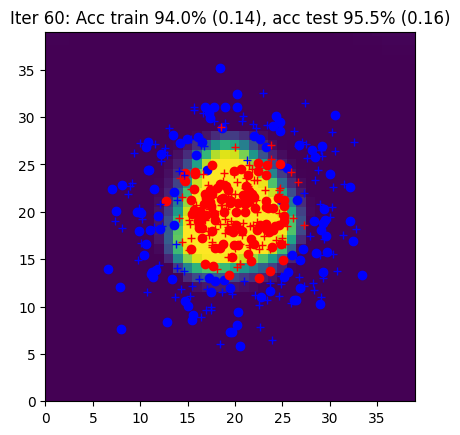

Iter 90: Acc train 94.5% (0.13), acc test 95.0% (0.15)


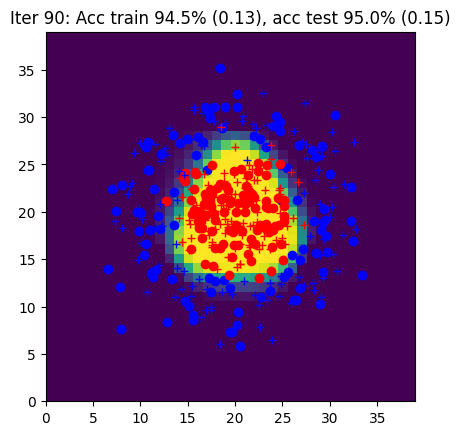

Iter 120: Acc train 93.0% (0.17), acc test 90.5% (0.23)


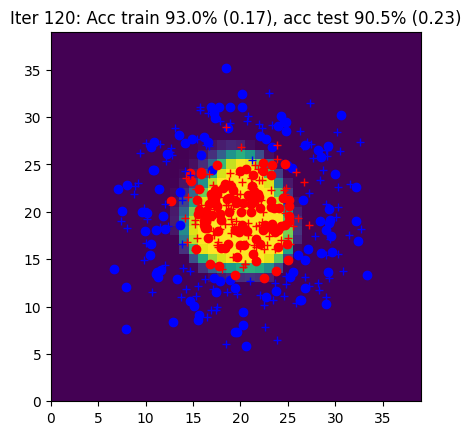

Iter 149: Acc train 95.5% (0.11), acc test 94.5% (0.18)


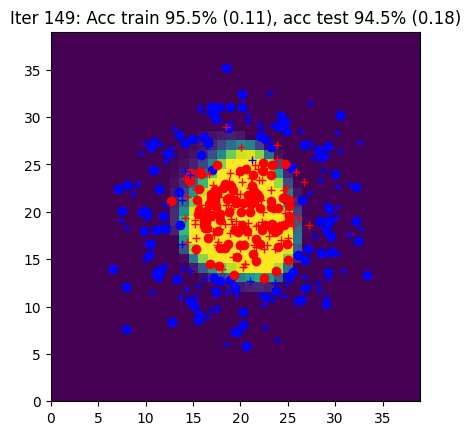

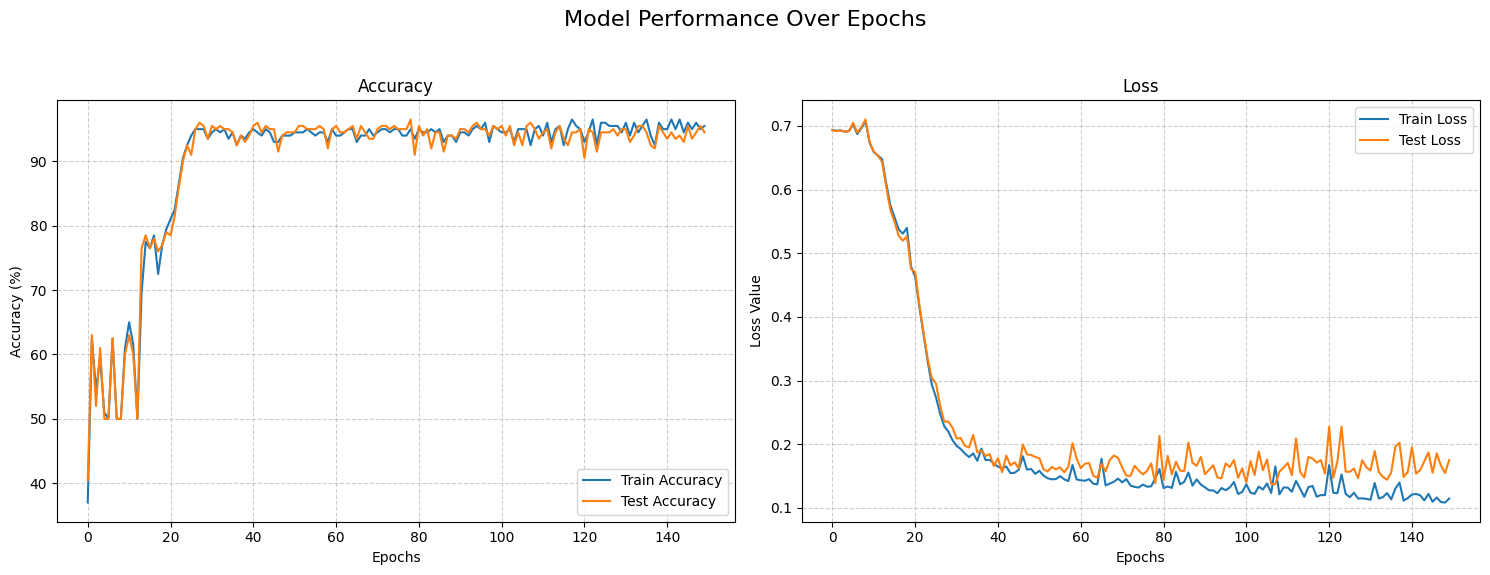

In [12]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 1
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)
train_by_hand(params, eta, N, Nbatch, data)

### `Nbatch = N`

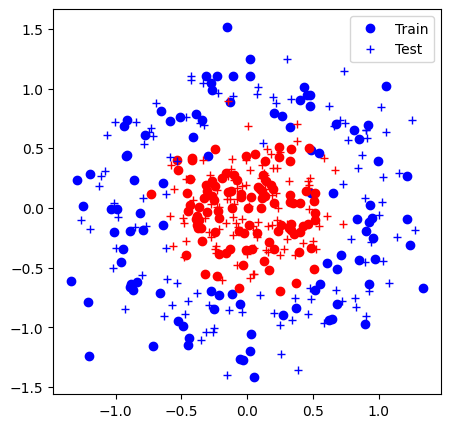

Iter 0: Acc train 55.5% (0.69), acc test 53.5% (0.69)


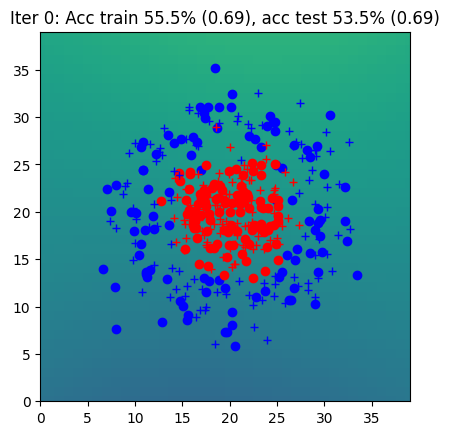

Iter 30: Acc train 50.0% (16.41), acc test 50.0% (16.49)


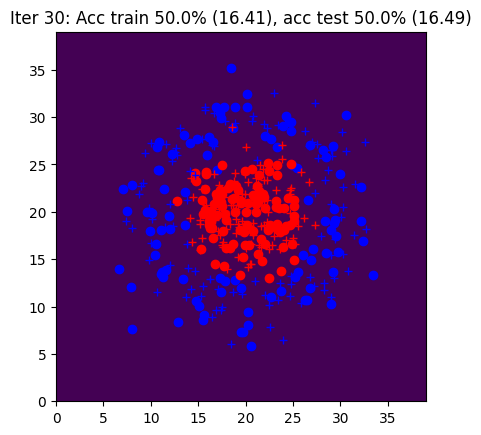

Iter 60: Acc train 50.0% (2.83), acc test 50.0% (2.61)


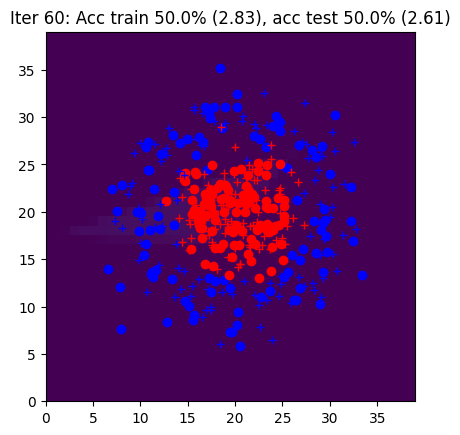

Iter 90: Acc train 85.5% (1.71), acc test 82.5% (2.20)


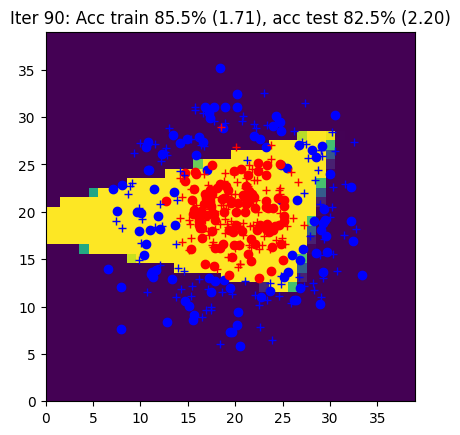

Iter 120: Acc train 63.5% (10.16), acc test 61.0% (10.90)


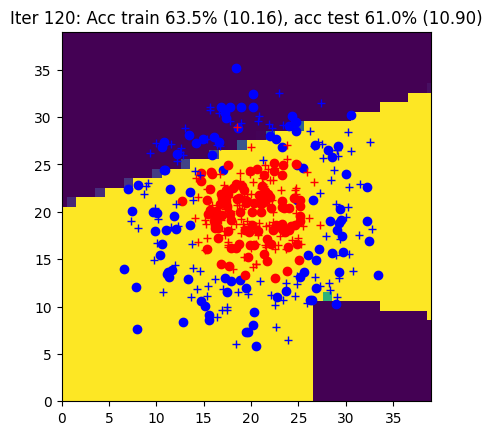

Iter 149: Acc train 91.0% (0.33), acc test 88.5% (1.10)


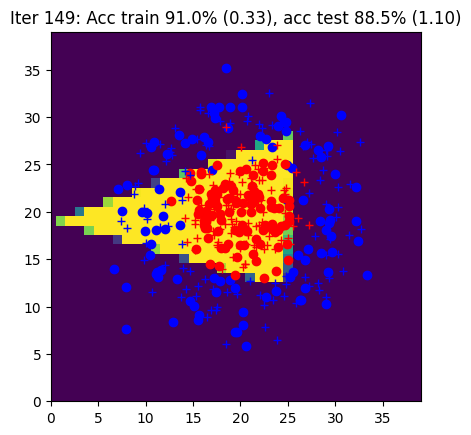

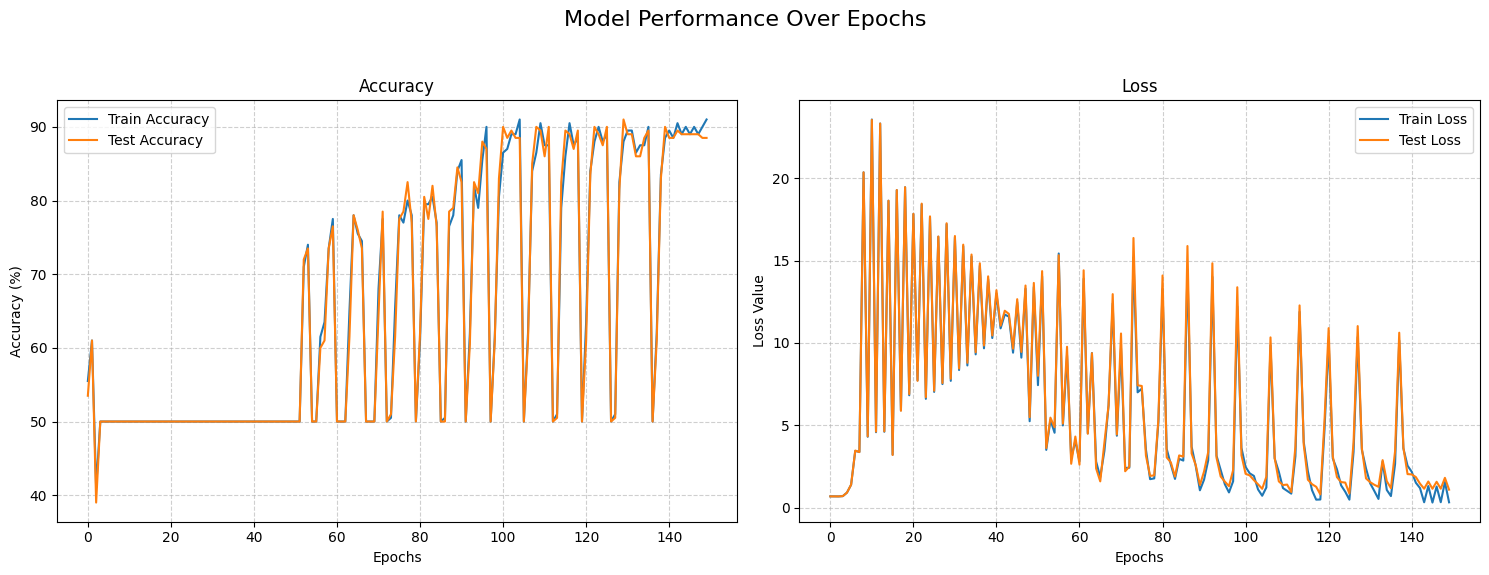

In [13]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = N
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)
train_by_hand(params, eta, N, Nbatch, data)

# Part 2 : Simplification of the backward pass with `torch.autograd`



In [14]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights

    params["Wh"] = torch.randn(nh, nx, requires_grad=True)
    params["Wy"] = torch.rand((ny, nh), requires_grad=True)
    params["bh"] = torch.zeros(nh, requires_grad=True)
    params["by"] = torch.zeros(ny, requires_grad=True)

    ####################
    ##      END        #
    ####################
    return params

The function `forward` remains unchanged from previous part.

The function `backward` is no longer used because of "autograd".

In [15]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():
        params["Wh"] -= eta * params["Wh"].grad
        params["Wh"].grad.zero_()
        params["Wy"] -= eta * params["Wy"].grad
        params["Wy"].grad.zero_()
        params["bh"] -= eta * params["bh"].grad
        params["bh"].grad.zero_()
        params["by"] -= eta * params["by"].grad
        params["by"].grad.zero_()

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure with autograd

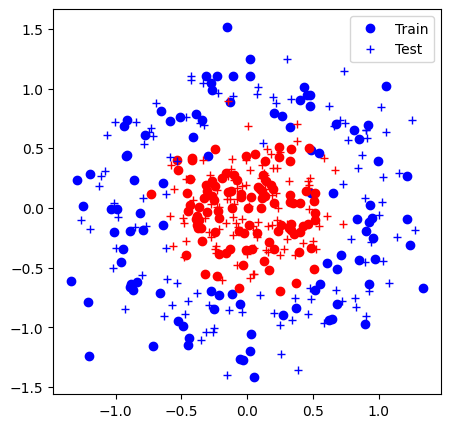

Iter 0: Acc train 53.0% (0.75), acc test 51.0% (0.75)


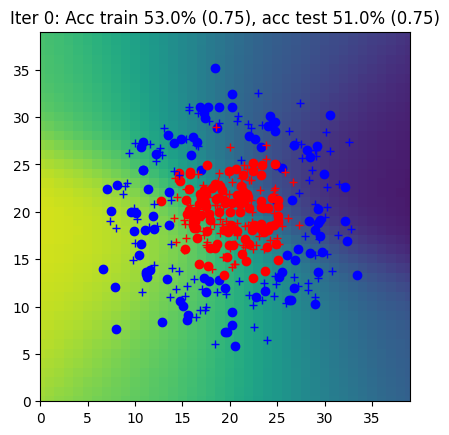

Iter 30: Acc train 83.0% (0.55), acc test 81.0% (0.55)


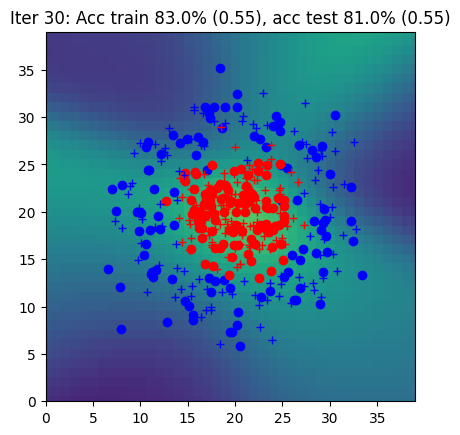

Iter 60: Acc train 95.5% (0.37), acc test 94.0% (0.38)


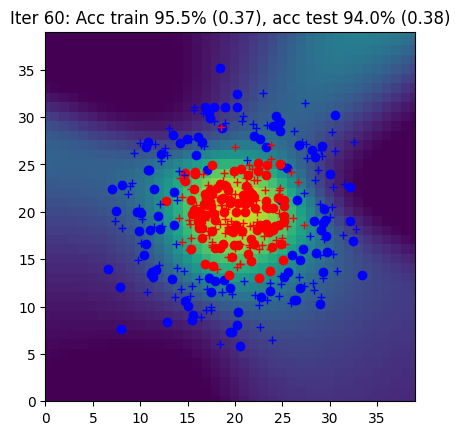

Iter 90: Acc train 94.0% (0.27), acc test 94.5% (0.28)


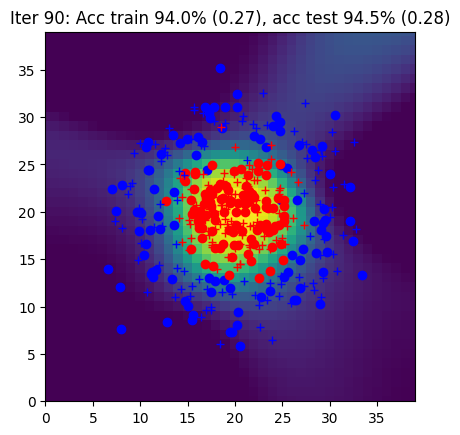

Iter 120: Acc train 95.0% (0.21), acc test 95.0% (0.22)


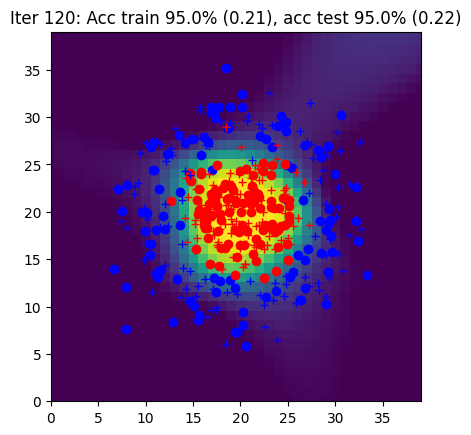

Iter 149: Acc train 95.0% (0.18), acc test 95.0% (0.20)


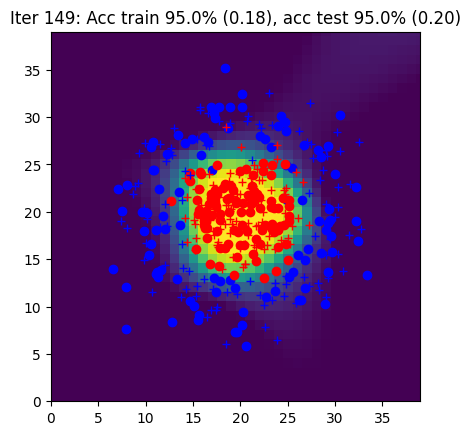

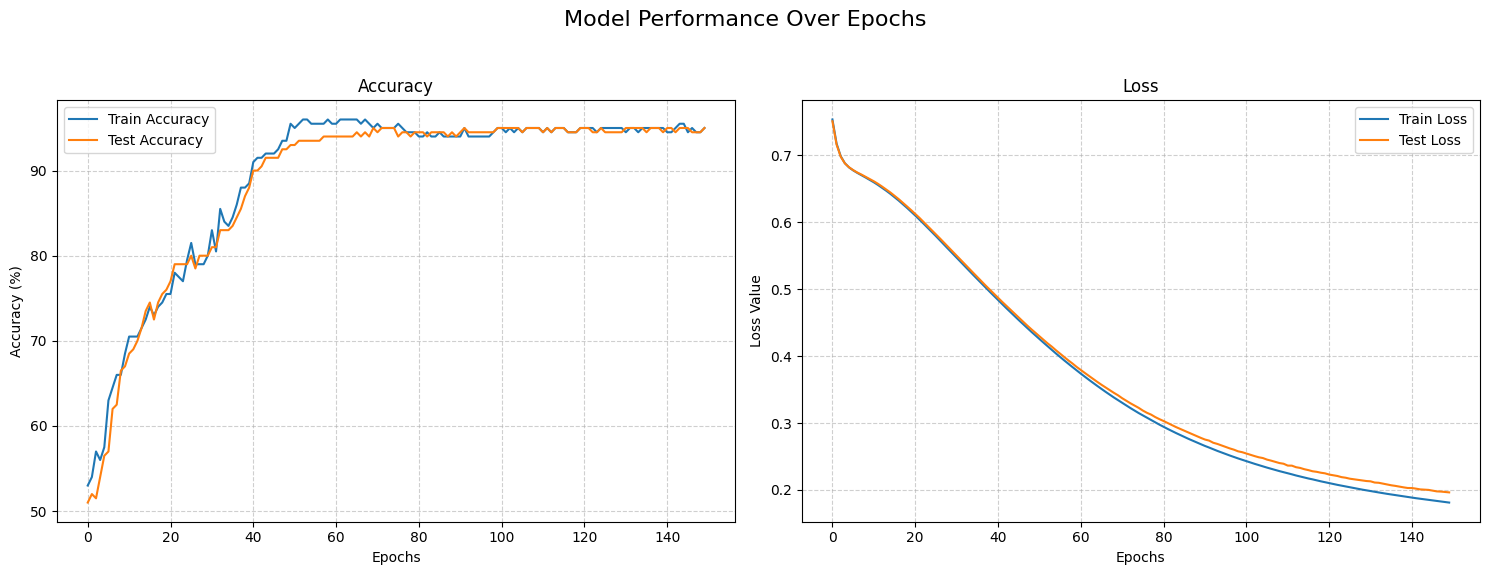

In [16]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, sgd
        # and the backward function with autograd
        Yhat, outputs = forward(params, X)
        L, acc = loss_accuracy(Yhat, Y)
        L.backward()
        params = sgd(params, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    if iteration % 30 == 0 or iteration == 149:
        title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
        print(title)
        data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach())
    curves[3].append(Ltest.detach())

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Model Performance Over Epochs', fontsize=16)

ax1 = axs[0]
ax1.plot(curves[0], label="Train Accuracy")
ax1.plot(curves[1], label="Test Accuracy")
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy (%)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)


ax2 = axs[1]

ax2.plot(curves[2], label="Train Loss")
ax2.plot(curves[3], label="Test Loss")
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss Value')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [17]:
def init_model(nx, nh, ny):

    #####################
    ## Your code here  ##
    #####################

    std_dev = 0.3

    layer_1 = torch.nn.Linear(nx, nh)
    layer_1.weight = torch.nn.Parameter(torch.randn(nh, nx) * std_dev)
    layer_1.bias = torch.nn.Parameter(torch.zeros(nh))
    layer_2 = torch.nn.Linear(nh, ny)
    layer_2.weight = torch.nn.Parameter(torch.randn(ny, nh) * std_dev)
    layer_2.bias = torch.nn.Parameter(torch.zeros(ny))


    model = torch.nn.Sequential(
        layer_1,
        torch.nn.Tanh(),
        layer_2
    )
    loss = torch.nn.CrossEntropyLoss()

    ####################
    ##      END        #
    ####################

    return model, loss

In [18]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function

    L = loss(Yhat, Y)

    _, indY = torch.max(Y, dim=1)
    _, indYhat = torch.max(Yhat, dim=1)
    acc = torch.mean((indY == indYhat).float()) * 100    # percentage

    ####################
    ##      END        #
    ####################

    return L, acc

In [19]:
def sgd(model: torch.nn.Sequential, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators
    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad

    ####################
    ##      END        #
    ####################
    return model

## Global learning procedure with autograd and `torch.nn`

# Part 4 : Simplification of the SGD with `torch.optim`

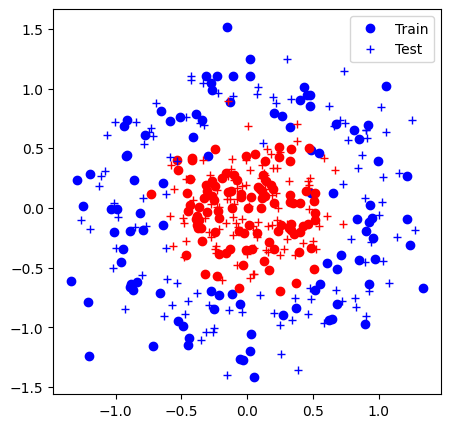

Iter 0: Acc train 49.0% (0.70), acc test 50.0% (0.70)


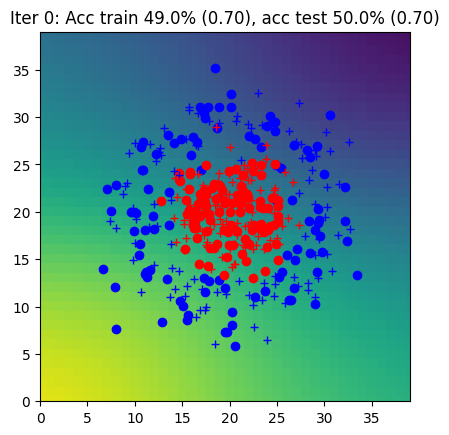

Iter 30: Acc train 72.5% (0.66), acc test 69.5% (0.67)


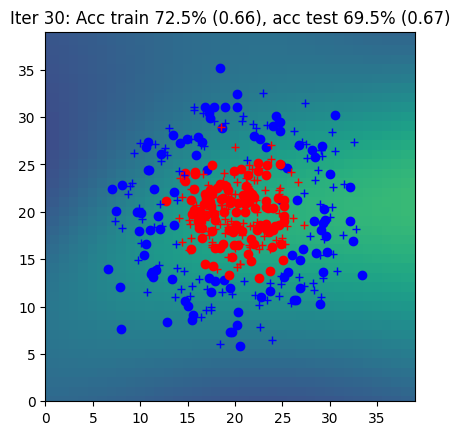

Iter 60: Acc train 83.5% (0.50), acc test 86.0% (0.50)


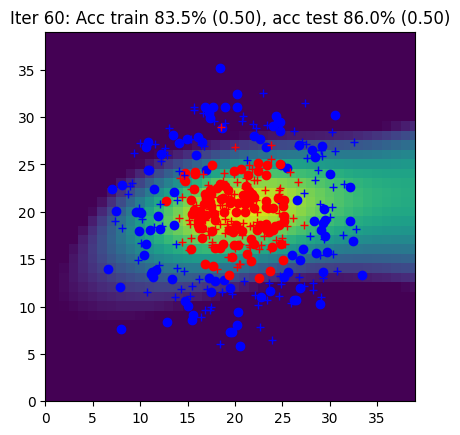

Iter 90: Acc train 94.5% (0.28), acc test 95.0% (0.28)


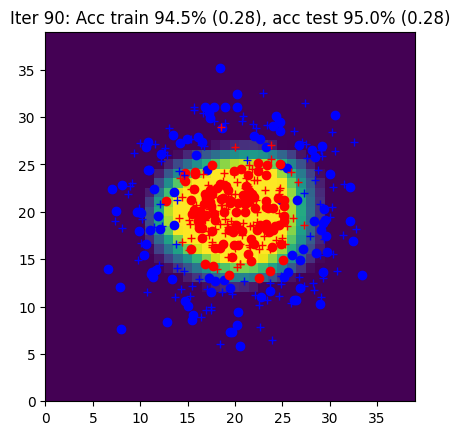

Iter 120: Acc train 97.0% (0.19), acc test 94.5% (0.20)


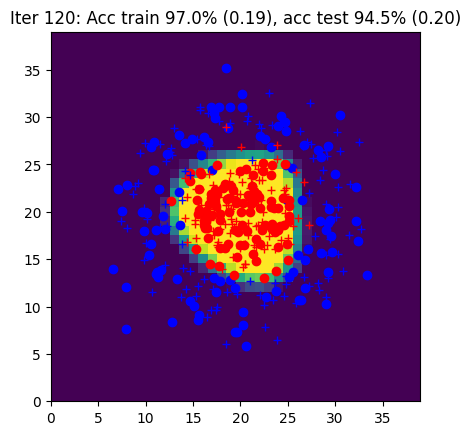

Iter 149: Acc train 97.0% (0.15), acc test 94.0% (0.18)


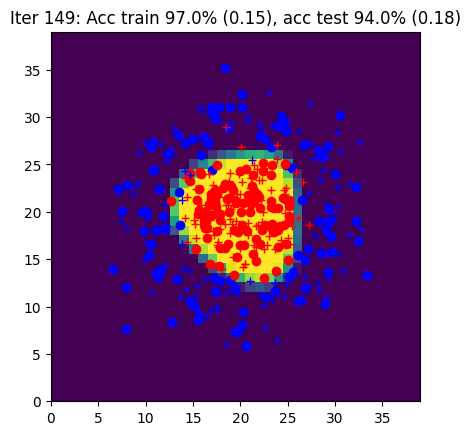

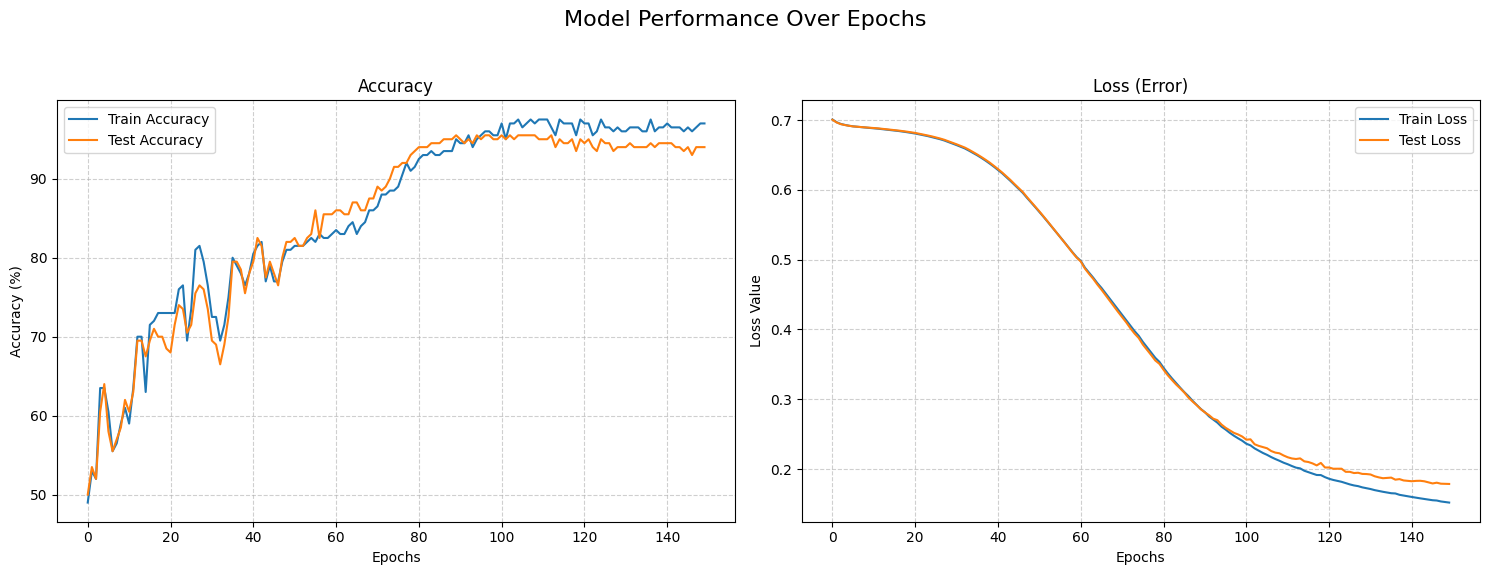

In [20]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.05

model, loss = init_model(nx, nh, ny)

curves = [[], [], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd
        Yhat = model.forward(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        model.zero_grad()
        L.backward()
        sgd(model, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    if iteration % 30 == 0 or iteration == 149:
        title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
        print(title)
        data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach())
    curves[3].append(Ltest.detach())

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Model Performance Over Epochs', fontsize=16)

ax1 = axs[0]
ax1.plot(curves[0], label="Train Accuracy")
ax1.plot(curves[1], label="Test Accuracy")
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy (%)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)


ax2 = axs[1]

ax2.plot(curves[2], label="Train Loss")
ax2.plot(curves[3], label="Test Loss")
ax2.set_title('Loss (Error)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss Value')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [21]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Your code here  ##
    #####################

    std_dev = 0.3

    layer_1 = torch.nn.Linear(nx, nh)
    layer_1.weight = torch.nn.Parameter(torch.randn(nh, nx) * std_dev)
    layer_1.bias = torch.nn.Parameter(torch.zeros(nh))
    layer_2 = torch.nn.Linear(nh, ny)
    layer_2.weight = torch.nn.Parameter(torch.randn(ny, nh) * std_dev)
    layer_2.bias = torch.nn.Parameter(torch.zeros(ny))


    model = torch.nn.Sequential(
        layer_1,
        torch.nn.Tanh(),
        layer_2
    )
    loss = torch.nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=eta)

    ####################
    ##      END        #
    ####################

    return model, loss, optim

The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after.

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

In [22]:
def train(model, eta, N, Nbatch, Xtrain, Ytrain, Xtest, Ytest):
    curves = [[],[], [], []]

    # epoch
    for iteration in range(150):

        # permute
        perm = np.random.permutation(N)
        Xtrain = data.Xtrain[perm, :]
        Ytrain = data.Ytrain[perm, :]

        #####################
        ## Your code  here ##
        #####################
        # batches
        for j in range(N // Nbatch):

            indsBatch = range(j * Nbatch, (j+1) * Nbatch)
            X = Xtrain[indsBatch, :]
            Y = Ytrain[indsBatch, :]

            # write the optimization algorithm on the batch (X,Y)
            # using the functions: loss_accuracy
            # the forward with the predict method from the model
            # the backward function with autograd
            # and then an optimization step
            Yhat = model.forward(X)
            L, acc = loss_accuracy(loss, Yhat, Y)
            model.zero_grad()
            optim.zero_grad()
            L.backward()
            optim.step()

        ####################
        ##      FIN        #
        ####################


        Yhat_train = model(data.Xtrain)
        Yhat_test = model(data.Xtest)
        Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
        Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
        Ygrid = model(data.Xgrid)

        if iteration % 30 == 0 or iteration == 149:
            title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
            print(title)
            data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

        curves[0].append(acctrain)
        curves[1].append(acctest)
        curves[2].append(Ltrain.detach())
        curves[3].append(Ltest.detach())

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Model Performance Over Epochs', fontsize=16)

    ax1 = axs[0]
    ax1.plot(curves[0], label="Train Accuracy")
    ax1.plot(curves[1], label="Test Accuracy")
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy (%)')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.6)


    ax2 = axs[1]

    ax2.plot(curves[2], label="Train Loss")
    ax2.plot(curves[3], label="Test Loss")
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss Value')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## $\eta = 0.05 $

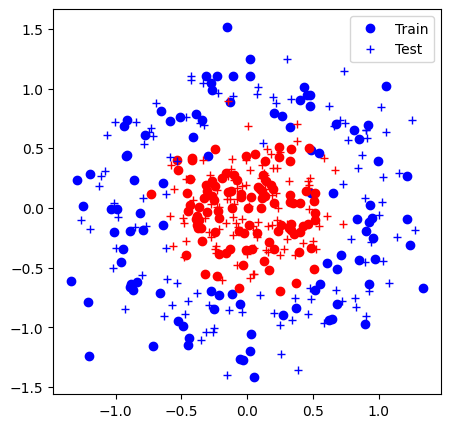

Iter 0: Acc train 54.0% (0.69), acc test 51.0% (0.69)


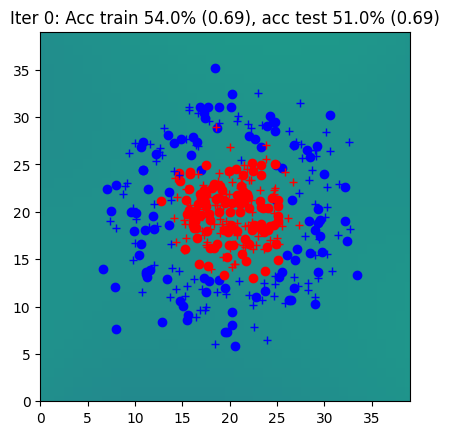

Iter 30: Acc train 69.5% (0.68), acc test 68.5% (0.68)


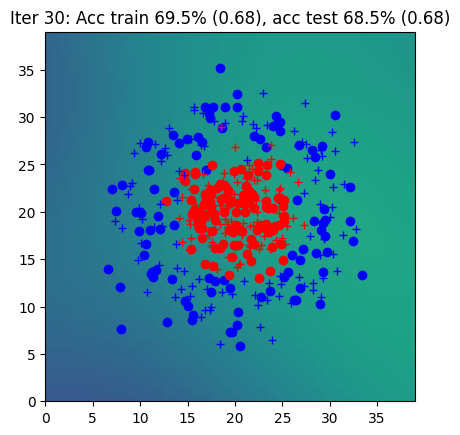

Iter 60: Acc train 86.0% (0.57), acc test 88.5% (0.57)


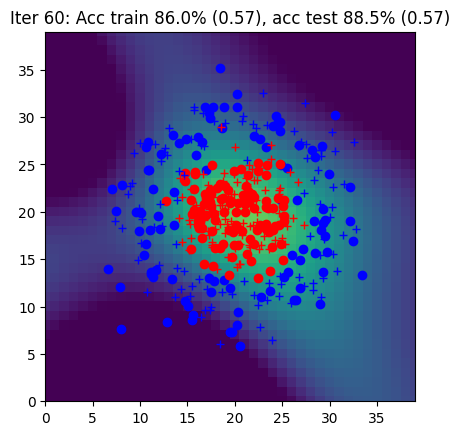

Iter 90: Acc train 96.5% (0.31), acc test 94.0% (0.32)


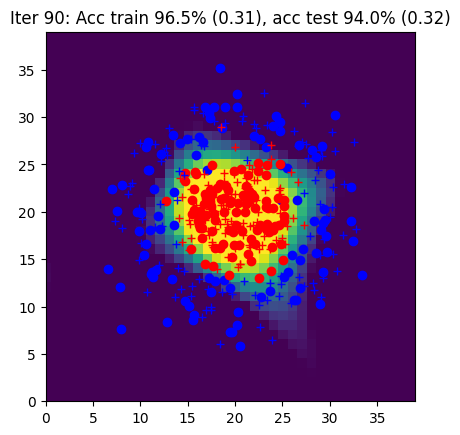

Iter 120: Acc train 96.0% (0.20), acc test 94.0% (0.22)


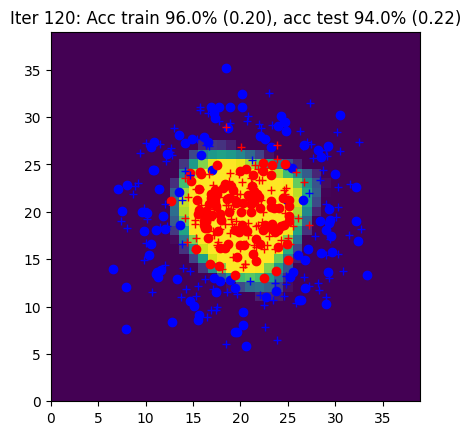

Iter 149: Acc train 96.5% (0.16), acc test 94.0% (0.18)


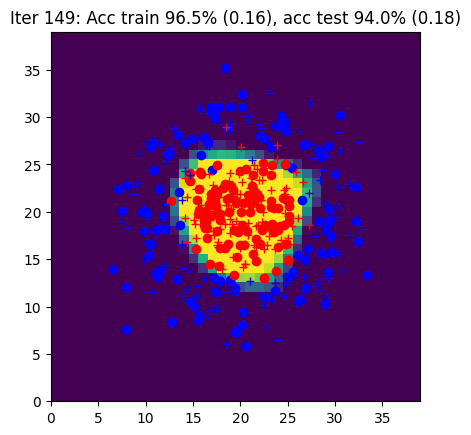

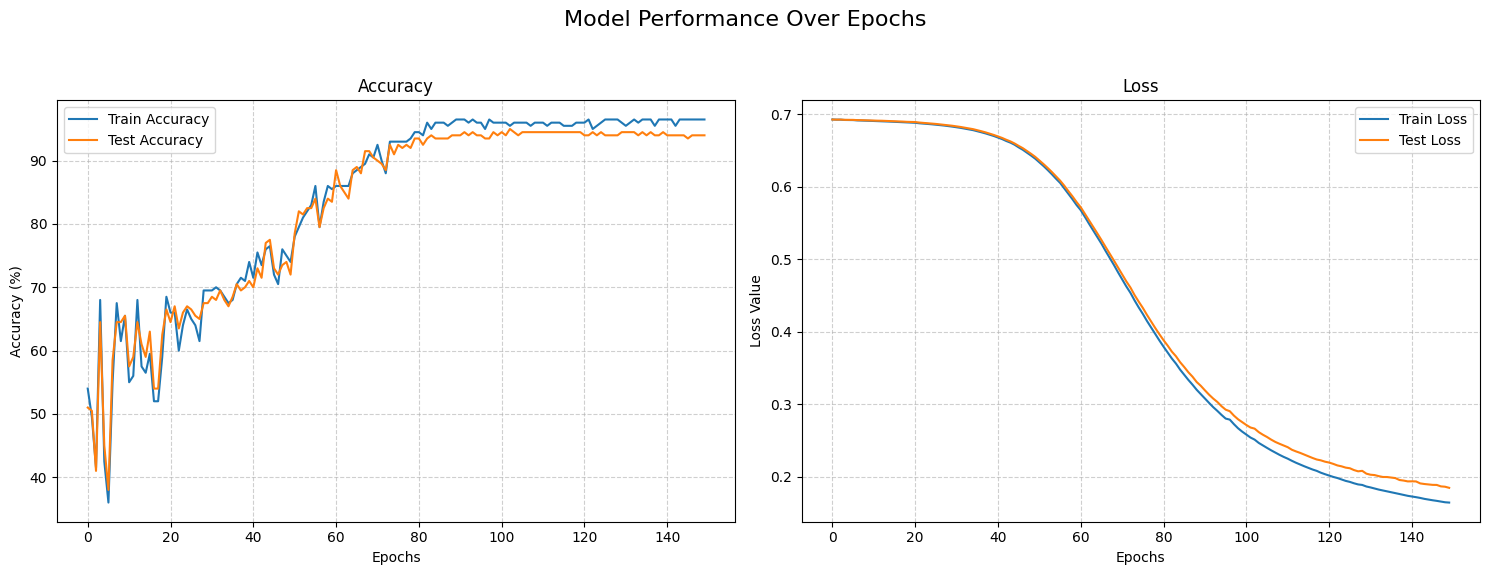

In [23]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.05

model, loss, optim = init_model(nx, nh, ny, eta)
train(model, eta, N, Nbatch, data.Xtrain, data.Ytrain, data.Xtest, data.Ytest)

## $\eta = 0.01 $

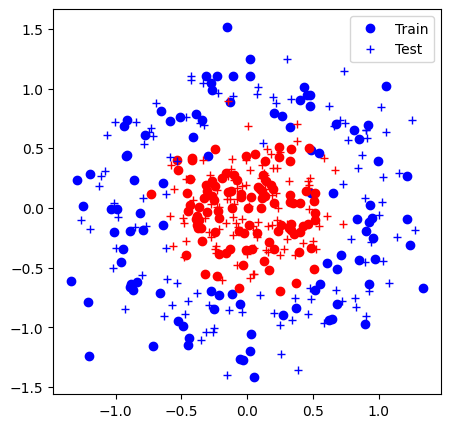

Iter 0: Acc train 52.0% (0.70), acc test 52.0% (0.69)


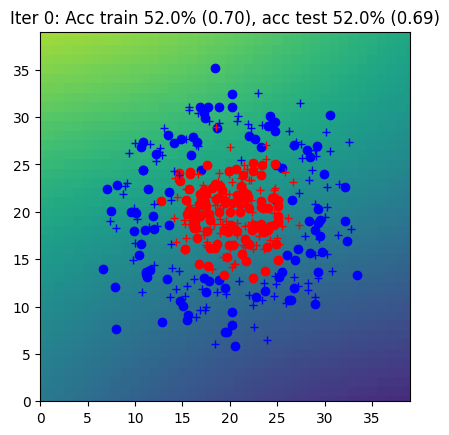

Iter 30: Acc train 53.0% (0.69), acc test 53.5% (0.69)


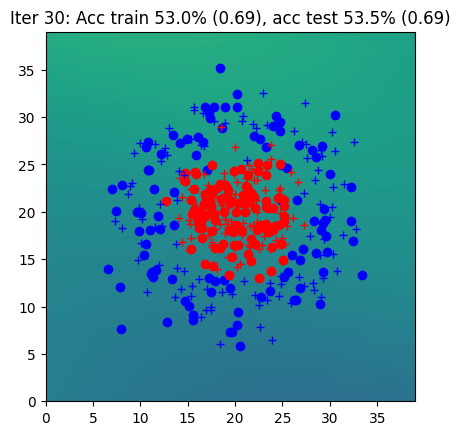

Iter 60: Acc train 52.5% (0.69), acc test 53.5% (0.69)


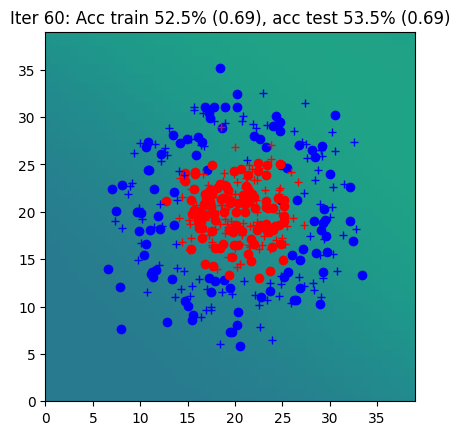

Iter 90: Acc train 51.0% (0.69), acc test 55.5% (0.69)


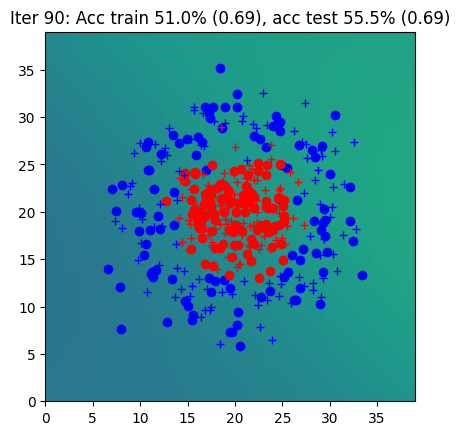

Iter 120: Acc train 53.0% (0.69), acc test 56.5% (0.69)


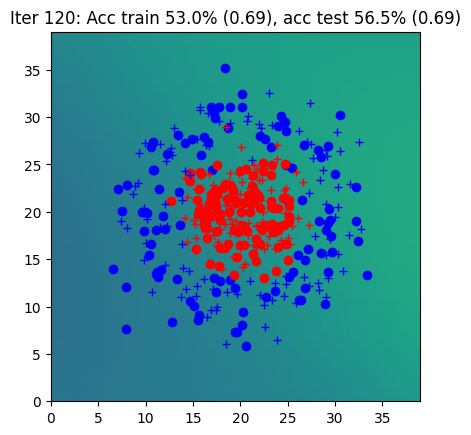

Iter 149: Acc train 52.0% (0.69), acc test 55.5% (0.69)


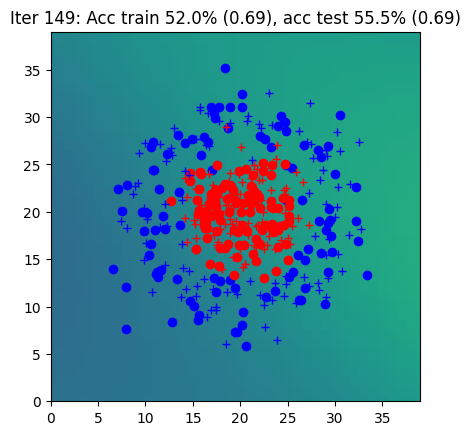

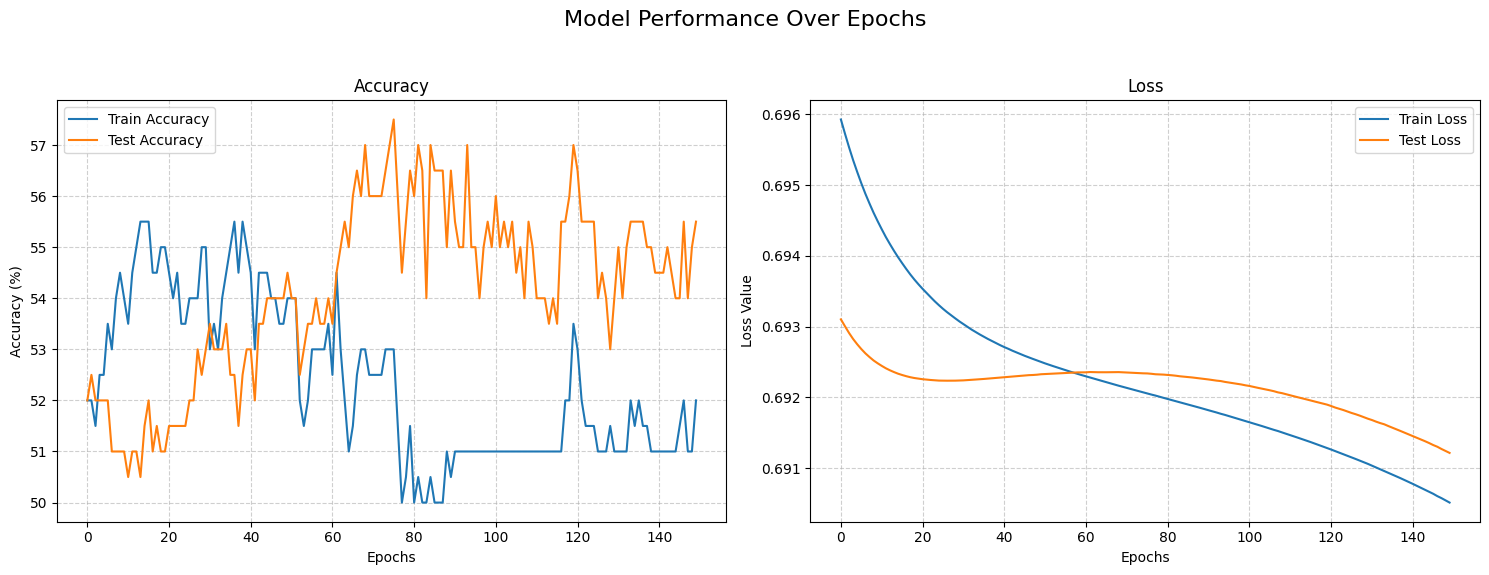

In [24]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.01

model, loss, optim = init_model(nx, nh, ny, eta)
train(model, eta, N, Nbatch, data.Xtrain, data.Ytrain, data.Xtest, data.Ytest)

## $\eta = 0.5 $

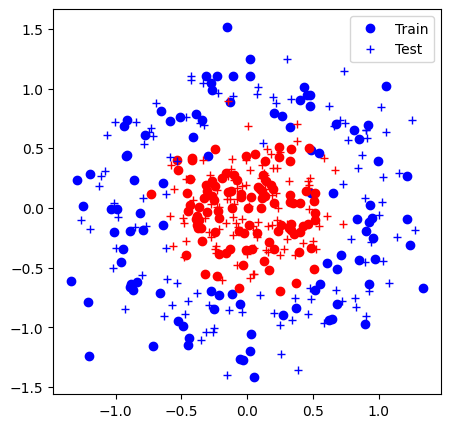

Iter 0: Acc train 50.0% (0.70), acc test 50.0% (0.70)


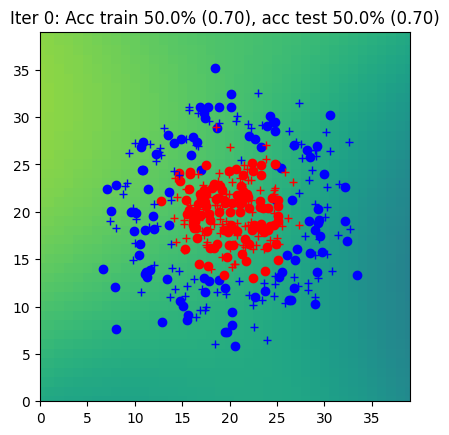

Iter 30: Acc train 94.0% (0.16), acc test 93.0% (0.20)


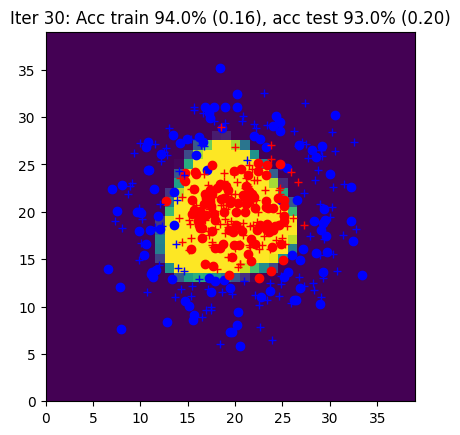

Iter 60: Acc train 95.5% (0.13), acc test 95.5% (0.15)


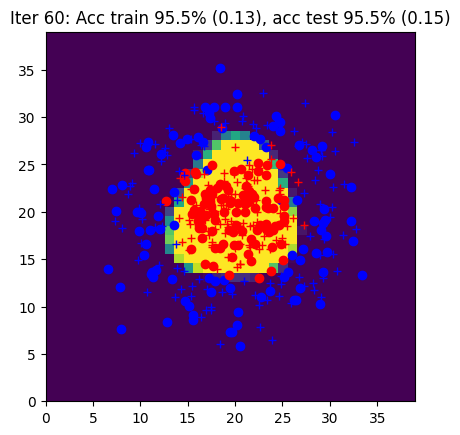

Iter 90: Acc train 95.0% (0.12), acc test 94.0% (0.16)


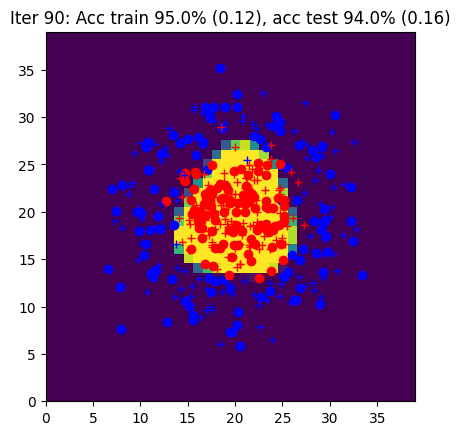

Iter 120: Acc train 96.0% (0.13), acc test 93.5% (0.18)


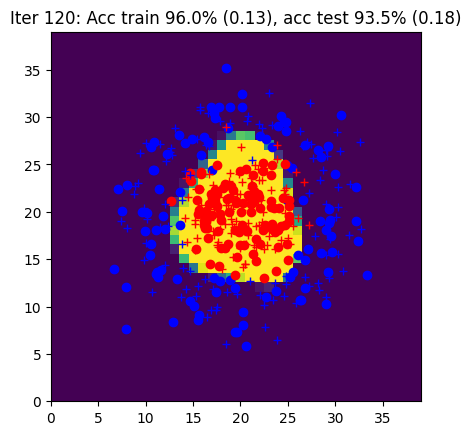

Iter 149: Acc train 92.5% (0.15), acc test 90.5% (0.26)


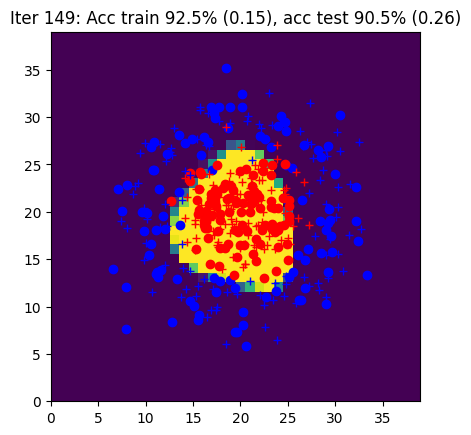

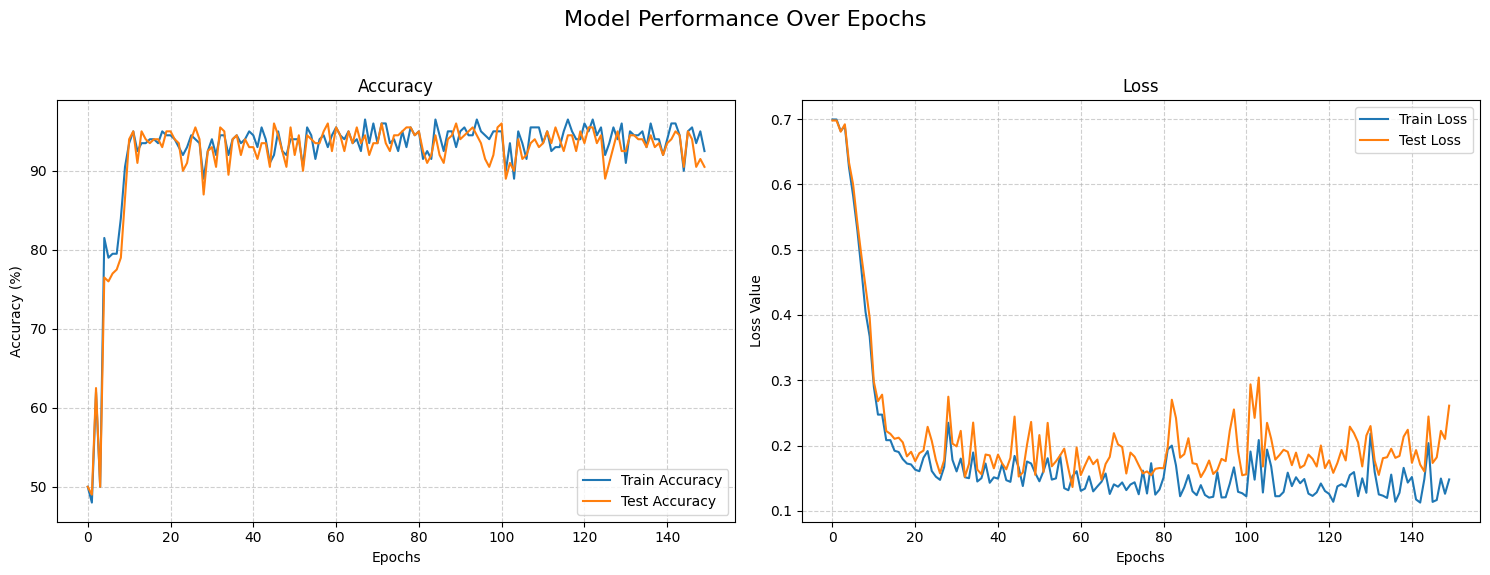

In [25]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.5

model, loss, optim = init_model(nx, nh, ny, eta)
train(model, eta, N, Nbatch, data.Xtrain, data.Ytrain, data.Xtest, data.Ytest)

## `Nbatch = 1`



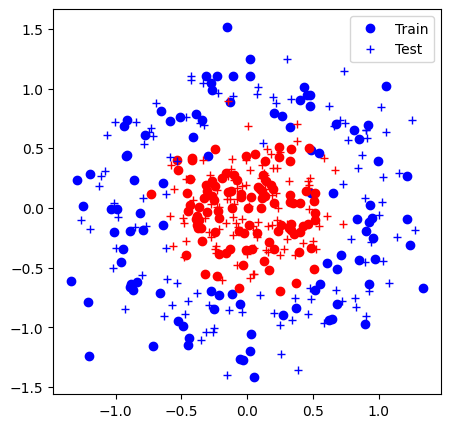

Iter 0: Acc train 56.0% (0.70), acc test 53.5% (0.70)


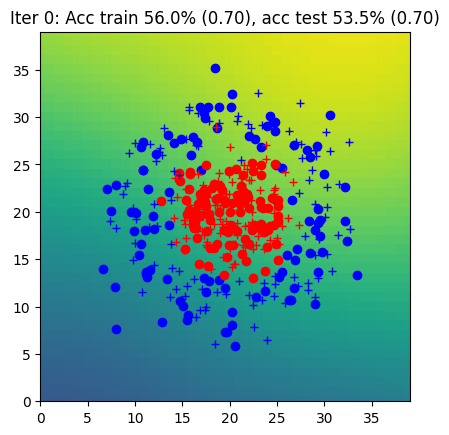

Iter 30: Acc train 95.0% (0.13), acc test 92.0% (0.19)


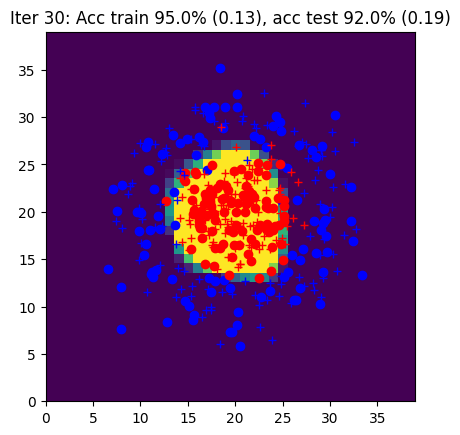

Iter 60: Acc train 96.0% (0.10), acc test 94.0% (0.17)


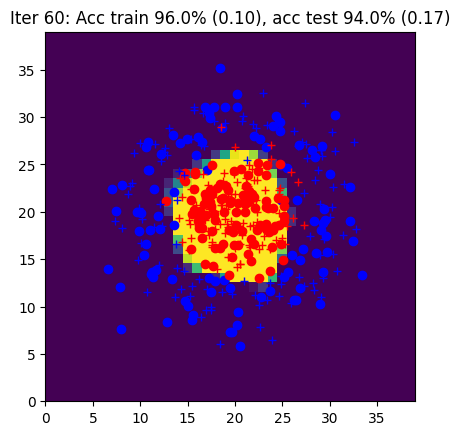

Iter 90: Acc train 97.5% (0.08), acc test 94.0% (0.16)


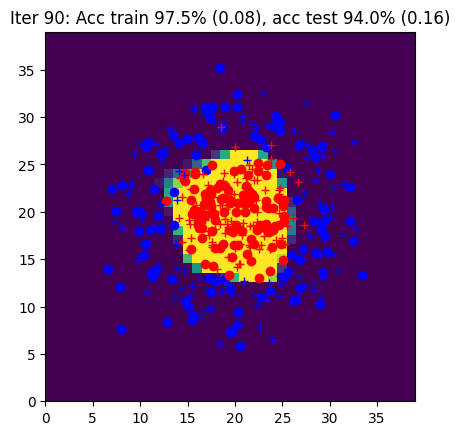

Iter 120: Acc train 98.0% (0.08), acc test 93.0% (0.19)


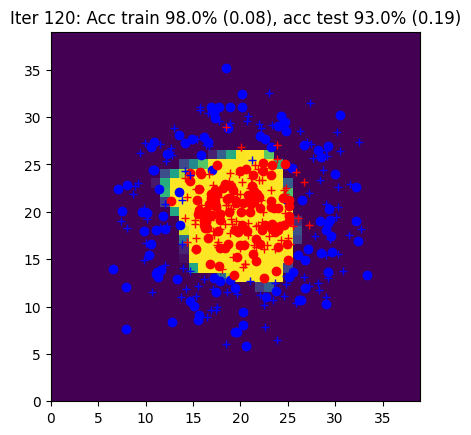

Iter 149: Acc train 97.5% (0.07), acc test 93.0% (0.17)


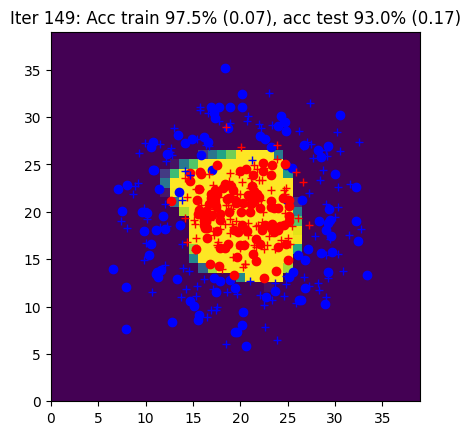

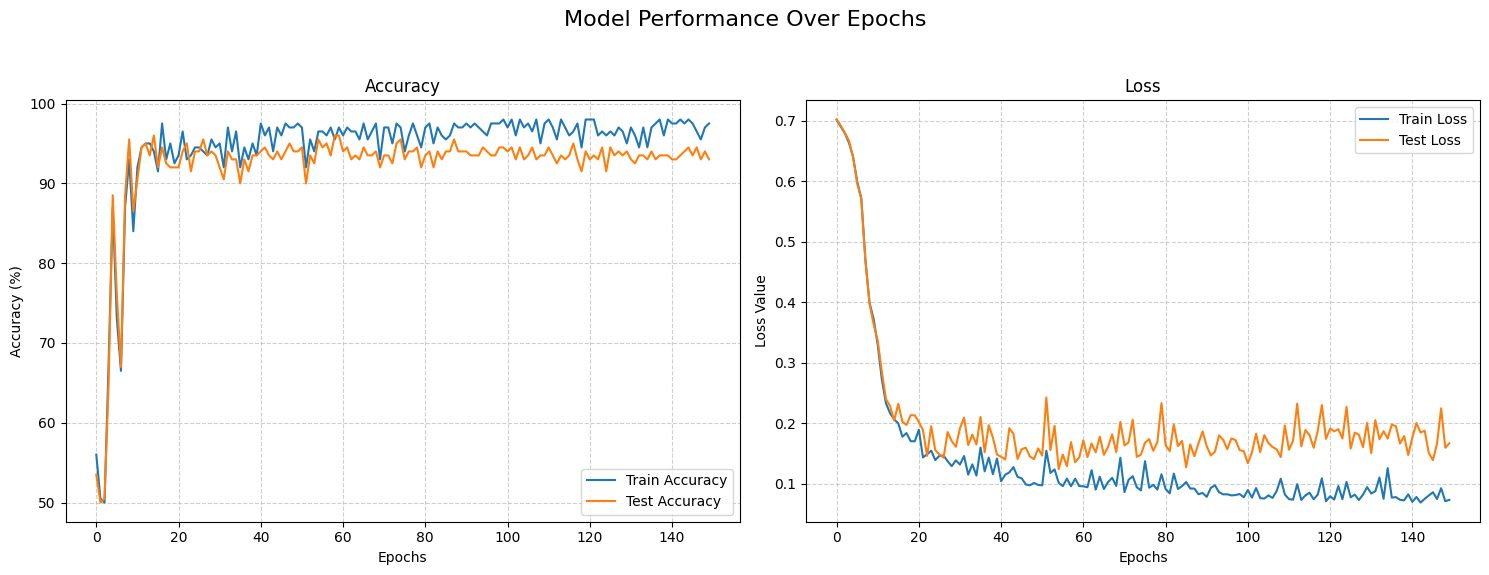

In [26]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 1
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.05

model, loss, optim = init_model(nx, nh, ny, eta)
train(model, eta, N, Nbatch, data.Xtrain, data.Ytrain, data.Xtest, data.Ytest)

## `Nbatch = N`

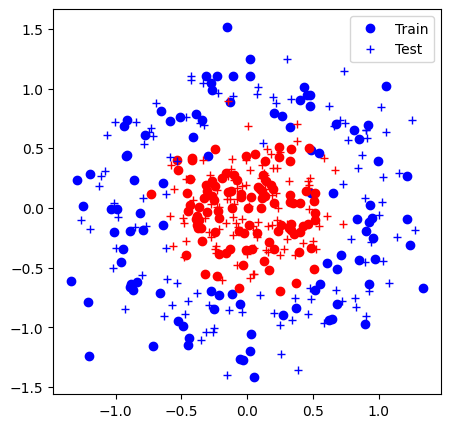

Iter 0: Acc train 51.5% (0.70), acc test 50.0% (0.69)


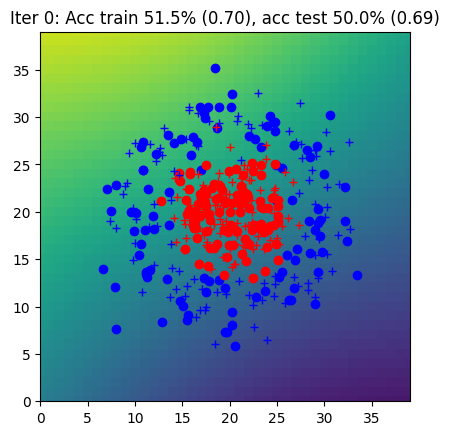

Iter 30: Acc train 53.5% (0.70), acc test 52.5% (0.69)


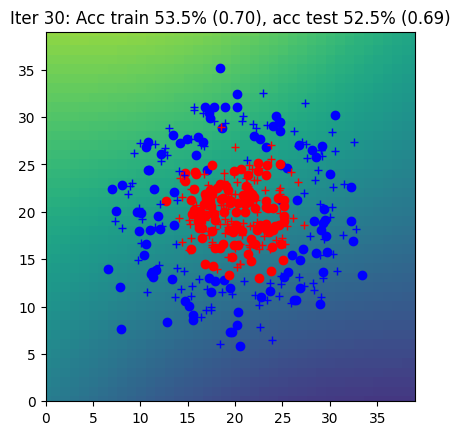

Iter 60: Acc train 55.0% (0.69), acc test 52.0% (0.69)


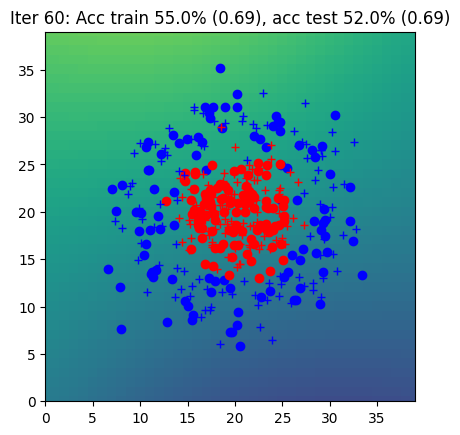

Iter 90: Acc train 54.5% (0.69), acc test 52.0% (0.69)


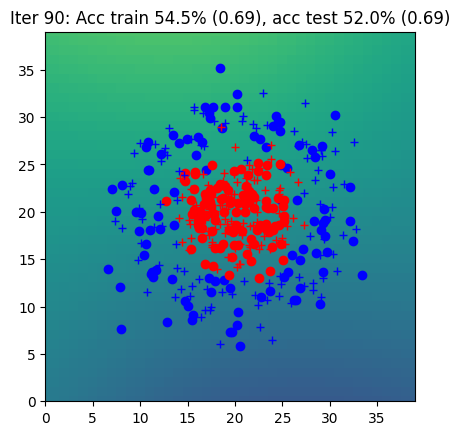

Iter 120: Acc train 54.5% (0.69), acc test 54.0% (0.69)


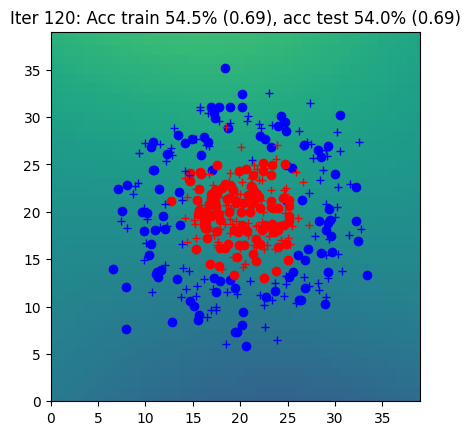

Iter 149: Acc train 57.0% (0.69), acc test 54.5% (0.69)


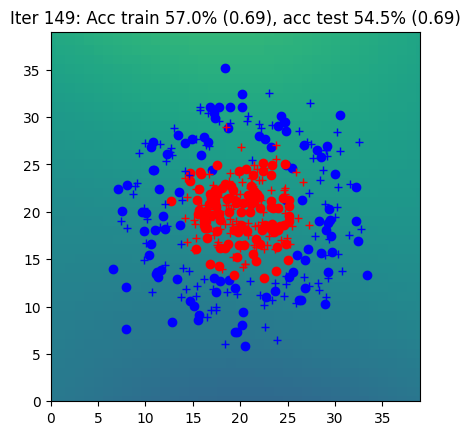

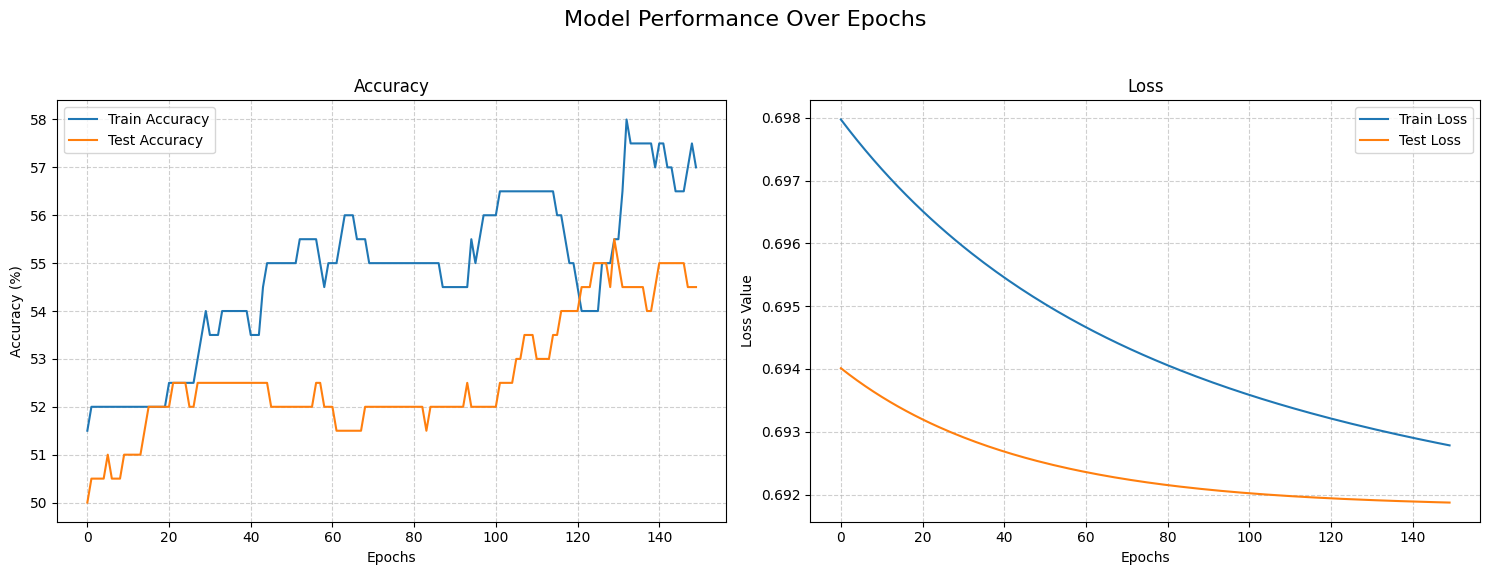

In [27]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = N
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.05

model, loss, optim = init_model(nx, nh, ny, eta)
train(model, eta, N, Nbatch, data.Xtrain, data.Ytrain, data.Xtest, data.Ytest)

# Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

In [28]:
# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03

Iter 0: Acc train 75.2% (0.78), acc test 76.2% (0.76)
Iter 30: Acc train 90.5% (0.31), acc test 90.4% (0.31)
Iter 60: Acc train 92.0% (0.26), acc test 92.0% (0.27)
Iter 90: Acc train 92.8% (0.23), acc test 92.5% (0.24)
Iter 120: Acc train 93.7% (0.21), acc test 93.1% (0.22)
Iter 149: Acc train 94.0% (0.19), acc test 93.5% (0.21)


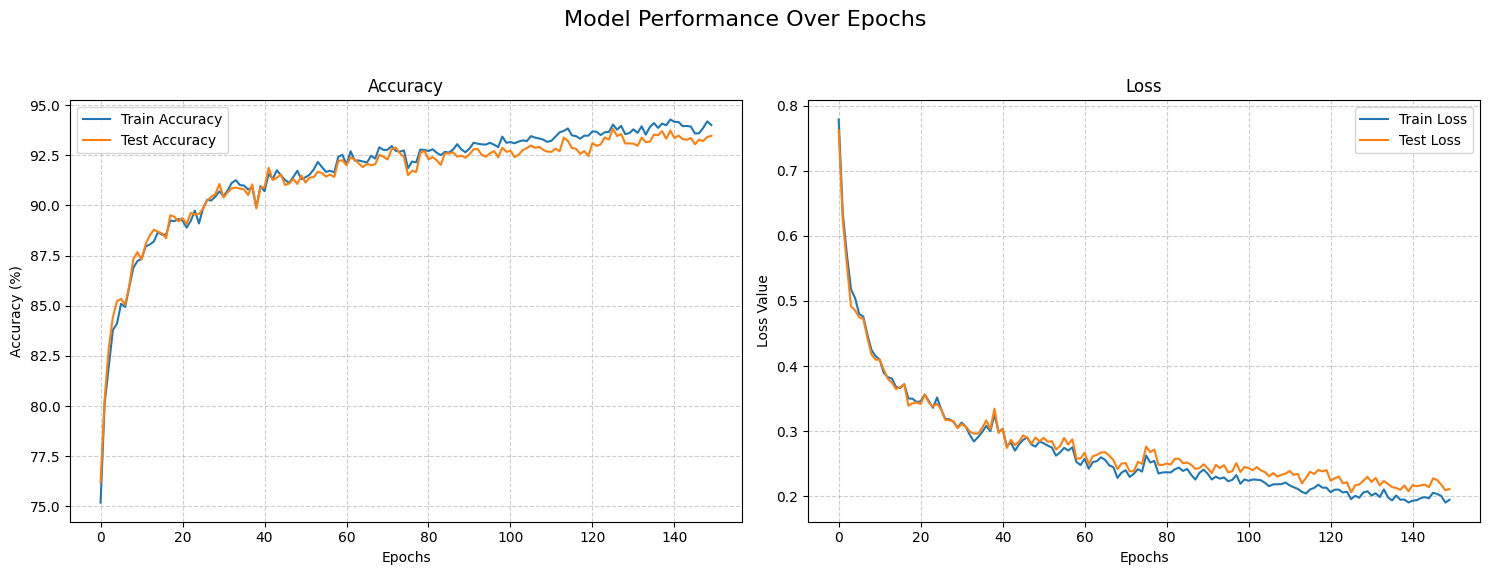

In [29]:
model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step
        Yhat = model.forward(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        model.zero_grad()
        optim.zero_grad()
        L.backward()
        optim.step()

    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)

    if iteration % 30 == 0 or iteration == 149:
        title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
        print(title)


    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach())
    curves[3].append(Ltest.detach())

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Model Performance Over Epochs', fontsize=16)

ax1 = axs[0]
ax1.plot(curves[0], label="Train Accuracy")
ax1.plot(curves[1], label="Test Accuracy")
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy (%)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)


ax2 = axs[1]

ax2.plot(curves[2], label="Train Loss")
ax2.plot(curves[3], label="Test Loss")
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss Value')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas :
### - First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?

Linear SVM does not work well with this dataset, since it is not linearly separable.
### - Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?

Best kernel is the polynomial with `degree = 2`, because it maps correctly the data in a higher dimensional space allowing them to be linearly separable.
### - Does the parameter C of regularization have an impact? Why ?

It has an impact, in particular for small values ($0.001$), leading to an incorrect classification due to a too large soft margin.

In [30]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions):
      plt.figure(2)
      plt.clf()
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.pause(1e-3)

`SVC(kernel='poly', degree=3-1, C=1)`

In [35]:
import sklearn.svm

############################
### Your code here   #######
### Train the SVM    #######
## See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

svm = sklearn.svm.SVC(kernel='poly', degree=3-1, C=1)
svm.fit(Xtrain, Ytrain)

###########################

SVC(C=1, degree=2, kernel='poly')

Accuracy : 95.50


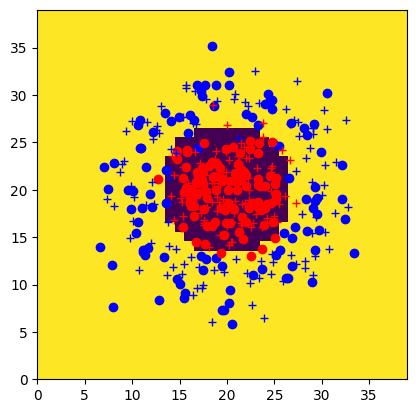

In [36]:
## Print results

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)

`LinearSVC()`

In [37]:
svm = sklearn.svm.LinearSVC()
svm.fit(Xtrain, Ytrain)

LinearSVC()

Accuracy : 53.00


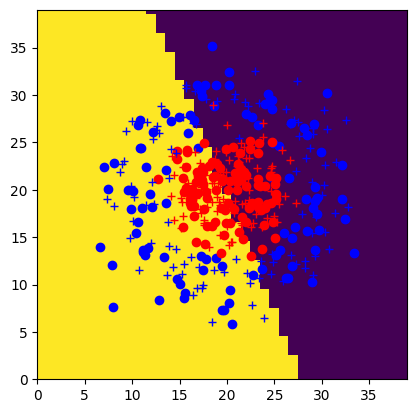

In [38]:
## Print results

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)

sklearn.svm.SVC(kernel='poly', degree=3-1, C=0.0001)

In [39]:
svm = sklearn.svm.SVC(kernel='poly', degree=3-1, C=0.0001)
svm.fit(Xtrain, Ytrain)

SVC(C=0.0001, degree=2, kernel='poly')

Accuracy : 53.50


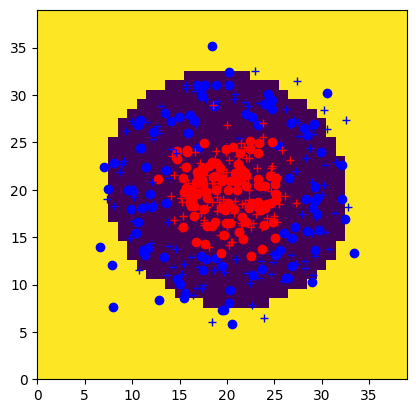

In [40]:
## Print results

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)